Author: Nedal Mohammad

# Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# Objective

To predict which customer is more likely to purchase the newly introduced travel package.

# Data Dictionary

### Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

# Exploratory Data Analysis

In [142]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Imports for notebook

#DataFrame manipulation and general imports
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
import numpy as np
import scipy.stats as stats

# Data Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#split data
from sklearn.model_selection import train_test_split

#feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, classification_report
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
#Bagging Classifier models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Boosting classifier models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

#hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#random imports
import warnings
warnings.filterwarnings('ignore')

In [143]:
data= pd.read_excel('Tourism.xlsx',sheet_name='Tourism')
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [144]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [145]:
data.drop(['CustomerID'],axis=1,inplace=True)
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')

There are 4888 rows and 19 columns.


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

Here, we can see that some entries are null and that some Dtypes are object. First, it is important we convert object types that represent categorical variables to categorical type, as this reduces memory usage. 

In [147]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


Here we can see a couple of things:
1. There are some variables reported numerically which actually represent categoricals -> these will be identified and converted in EDA
2. Customer's Age range from 18 to 61 years
3. From number of person visiting we can see that the average customer takes about 3 people with them when they go on a trip, with a minimum of 1 and a maximum of 5
4. On average there are 3-4 follow ups after a sales pitch
5. Most people prefer a 3 to 4 star property
6. The average customer takes 3 trips / year. The maximum in the set is 22 trips per year while 75% of customers take only 4 or fewer trips / year
7. The average customer only brings 1 child on a trip with them at a time while the maximum was 3. Some customers bring no children
8. The mean monthly income of the customers is 23619.85 while the maximum is 98678/month. 75% of customers earn less than or equal to 25,571

In [148]:
#convert all to categorical or numerical dtypes.
data['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

It appears that for TypeofContact feature, there are 2 designations while some rows contain a null/missing value. Customer's can either be invited by the company to hear the pitch or can inquire about it themselves. This feature appears categorical therefore it will be converted below.

In [149]:
data['Occupation'].unique()

array(['Salaried', 'Free Lancer', 'Small Business', 'Large Business'],
      dtype=object)

There are only 4 unique occupations in the data set and the descriptions are very broad.. i.e. free lancer. This feature will be converted to categorical.

In [150]:
data['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In unique genders we identify a typo present in the data collection where 'Female' is recorded as 'Fe Male'. This will have to be fixed. This feature will be converted to categorical.

In [151]:
data['ProductPitched'].unique()

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

There are five products being pitched by the company. The current products are:'Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'. Customer profiles will be made based on product pitches that were accepted by the customer. The company wishes to start pitching a new product and desires to know who to market it to. This feature will be converted to categorical.

In [152]:
data['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

The four unique marital statuses present in the data set are: 'Single', 'Divorced', 'Married', 'Unmarried'

In [153]:
data['Designation'].unique()

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

Customers come from only 5 designations which are 'Manager', 'Executive', 'Senior Manager', 'AVP', and 'VP'. These all appear to be high ranking positions. 

### Converting data types

In [154]:
data['TypeofContact']=data['TypeofContact'].astype('category')
data['Occupation']=data['Occupation'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['ProductPitched']=data['ProductPitched'].astype('category')
data['MaritalStatus']=data['MaritalStatus'].astype('category')
data['Designation']=data['Designation'].astype('category')
data['ProdTaken']=data['ProdTaken'].astype('category')
data['CityTier']=data['CityTier'].astype('category')
data['PreferredPropertyStar']=data['PreferredPropertyStar'].astype('category')
data['Passport']=data['Passport'].astype('category')
data['OwnCar']=data['OwnCar'].astype('category')
data['PitchSatisfactionScore']=data['PitchSatisfactionScore'].astype('category')

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [156]:
#obtaining a missing value count per column and sorting it.
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

Above shows the number of missing values/ feature. Missing values will be imputed after EDA is complete. 
Below shows the percentage of missing values per feature, which can often be a more useful metric:

In [157]:
(data.isnull().sum().sort_values(ascending=False)/4880)*100

DurationOfPitch             5.143443
MonthlyIncome               4.774590
Age                         4.631148
NumberOfTrips               2.868852
NumberOfChildrenVisiting    1.352459
NumberOfFollowups           0.922131
PreferredPropertyStar       0.532787
TypeofContact               0.512295
Gender                      0.000000
CityTier                    0.000000
Occupation                  0.000000
ProductPitched              0.000000
NumberOfPersonVisiting      0.000000
Designation                 0.000000
MaritalStatus               0.000000
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
ProdTaken                   0.000000
dtype: float64

Even at 5% missing values in the duration of pitch, I think it is still worth imputing the missing values over dropping the entire column. All missing values will be imputed after EDA.

### Do univariate analysis to determine how to correct for outliers and missing values.

Goals:
1. For Numerical Variables, observe spread and distribution of data.
2. For Categorical Variables, observe frequency

In [158]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = False, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#While doing uni-variate analysis of categorical variables we want to study their frequency
#This function takes the categorical variable as an input and returns the frequency bar graph 
def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

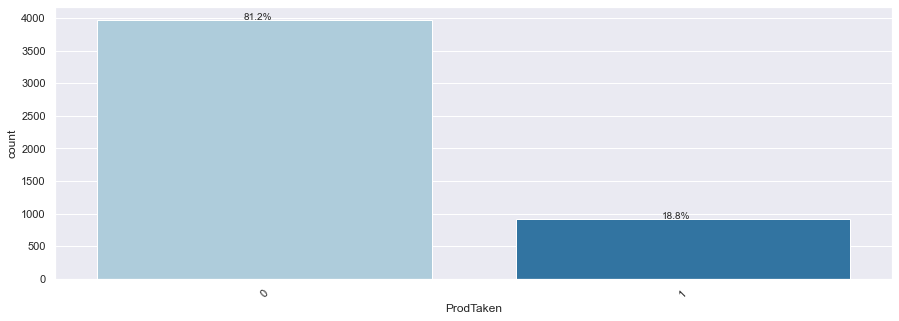

In [159]:
perc_on_bar(data,'ProdTaken')

Here, we can see an imbalance in the target variable: in the data, 81.2% of people rejected the offer while 18.8% accepted the offer. Essentially, only about 1 in 5 sales pitches is successful. This is the metric we wish to increase by offering the new package and using ML to better determine which customers are more worth providing a sales pitch to (which costs time and resources, and is a buisness improvement in its own right).  

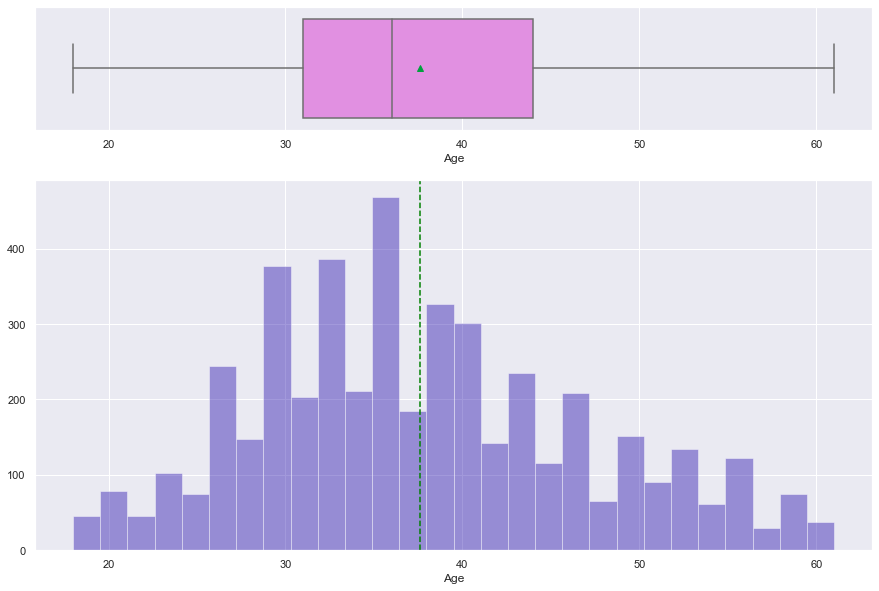

In [160]:
histogram_boxplot(data['Age'])

The Age column appears to have a pretty uniform distribution with a slight skew with mean > median indicating a right/positive skew. No outliers are visually present outside the whiskers of the boxplot.

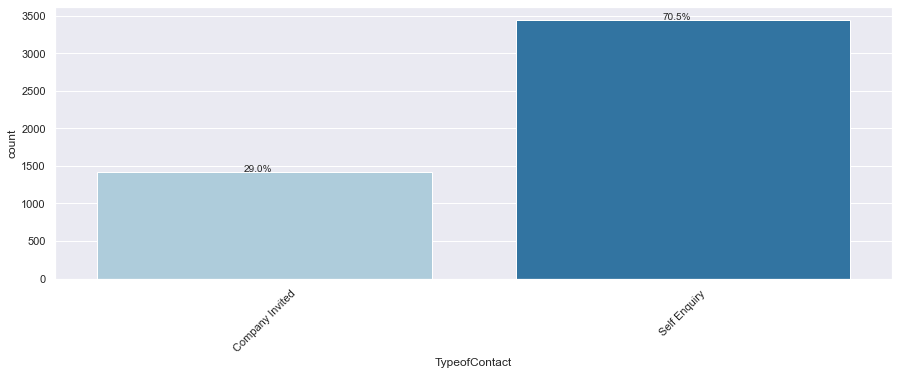

In [161]:
perc_on_bar(data,'TypeofContact')

The TypeofContact column appears to be a binary categorical with a distribution showing that 29% of the interactions recorded in the dataset were initiated by the company and 70.5% were initiated by the customer. The usefullness of this notebook is to increase the number of company invited product purchases. 

At first glance, the distribution of the CityTier column indicates that it is actually a categorical variable, so the data type will be converted and a bar plot will be displayed.

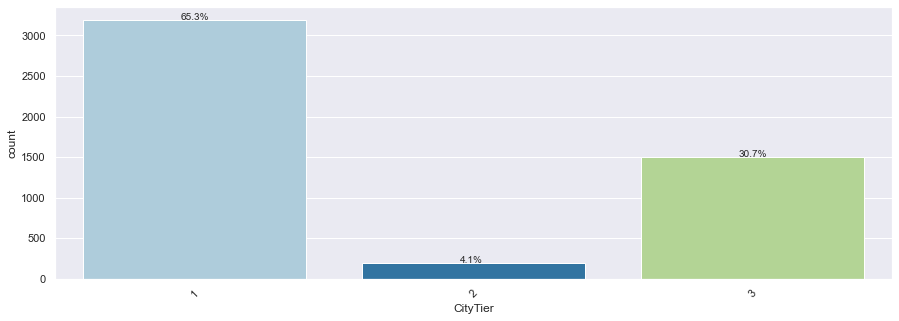

In [162]:
perc_on_bar(data,'CityTier')

The data dictionary for this set indicates that : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3

Therefore it is a categorical in which order matters.

65.3% of customers are in a Tier 1 city, 4.1% are in a Tier 2 city, and 30.7% are in a Tier 3 city.

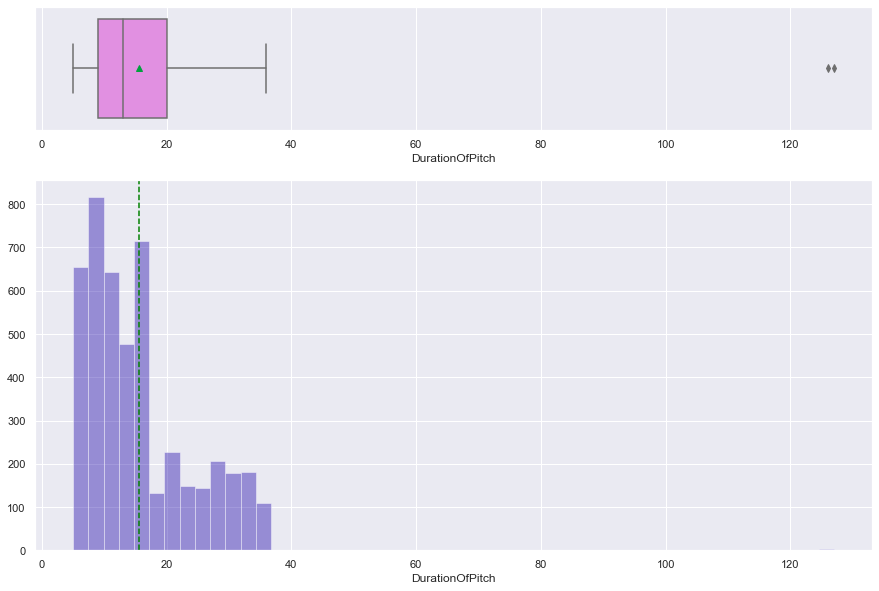

In [163]:
histogram_boxplot(data['DurationOfPitch'])

The DurationOfPitch column appears to favor smaller numbers and shows a positive/right skew with the mean > median. There are some outliers present above 120 mins which will need to be dealt with. This will probably be done via capping.

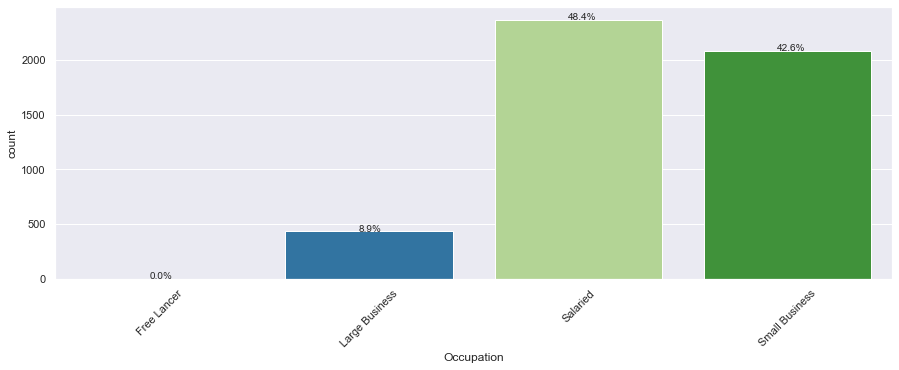

In [164]:
perc_on_bar(data,'Occupation')

In [165]:
data[data['Occupation']=='Free Lancer']

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
2446,1,38.0,Self Enquiry,1,9.0,Free Lancer,Male,4,5.0,Basic,3.0,Single,8.0,1,3,0,1.0,Executive,20768.0


Customer occupations are most frequently salaried at 48.4% while 42.6% own small buisnesses and 8.9% own a large buisness. The free Lancer occupation is the lowest at 0.0% - and only actually contains 2 instances.

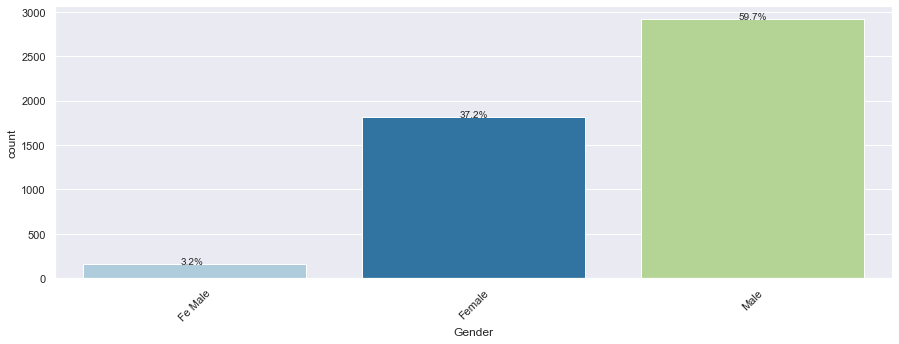

In [166]:
perc_on_bar(data,'Gender')

In Gender column we can see a data error. Some values are reported as 'Fe Male' instead of 'Female'. I will assume the intention was for these entries to all fall into the same category and convert the entries as 'Fe Male' -> 'Female'. 

In [167]:
data['Gender'].replace(to_replace='Fe Male', value='Female',inplace=True)

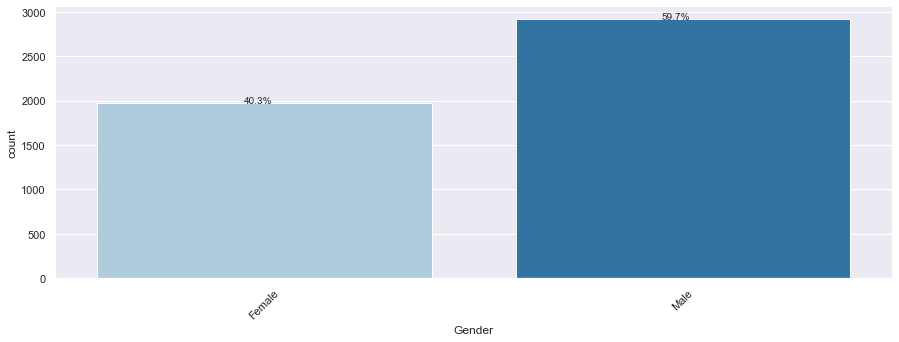

In [168]:
perc_on_bar(data,'Gender')

Now that we have solved the data error we can see that 40.3% of customers are Female while 59.7% of customers are male.

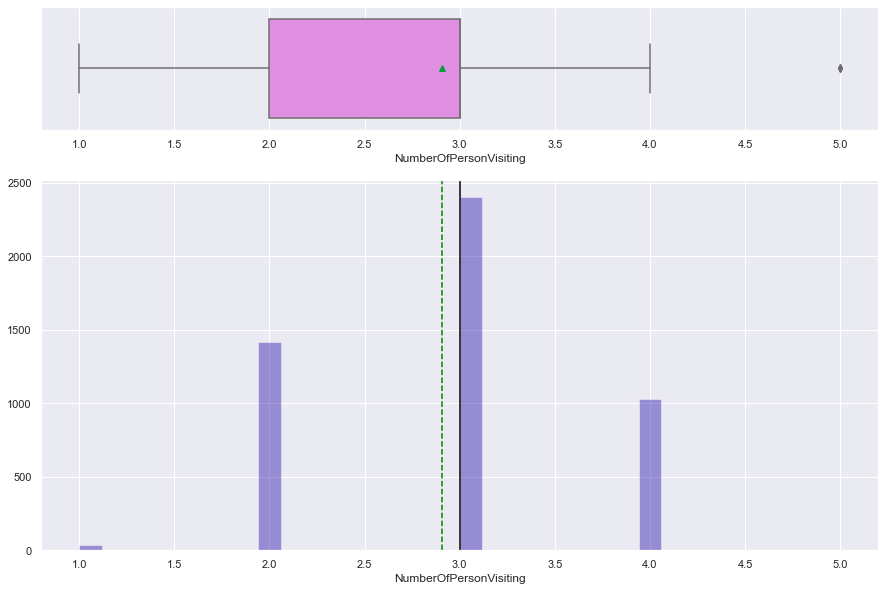

In [169]:
histogram_boxplot(data['NumberOfPersonVisiting'])

For the NumberOfPersonsVisiting column, we see a relatively normal distribution. There appears to be an outlier at 5 persons visiting. This outlier appears to be meaningful information in the data and would most likely not cause any issues when running algorithms as the median/ mean are right around 3 persons visiting. Therefore, the outlier will be included in analysis.

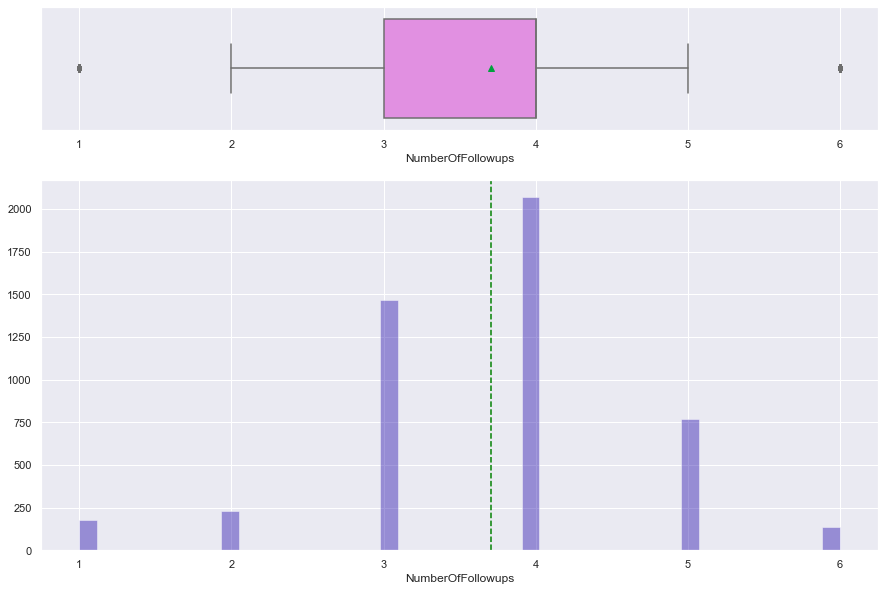

In [170]:
histogram_boxplot(data['NumberOfFollowups'])

For the NumberOfFollowups column, we also see a relatively normal distribution. There appears to be outliers at 6 and at 1 follow ups. These outlier appears to be meaningful information in the data and would most likely not cause any issues when running algorithms as the median/ mean are right around 4 follow ups Therefore, the outlier will be included in analysis.

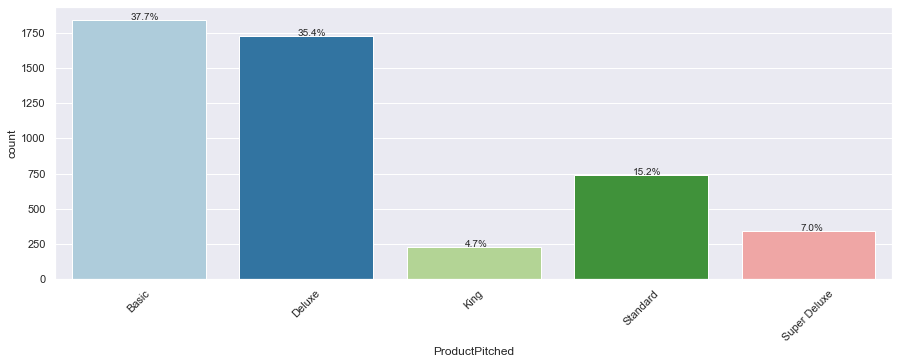

In [171]:
perc_on_bar(data,'ProductPitched')

The ProductPitched columns shows us that currently the Basic and Deluxe packages are the most frequently pitched. The Basic Package is pitched 37.7% of the time while the Deluxe package is pitched 35.4% of the time. The next most frequently pitched option is Standard representing 15.2% of pitches followed by the Super Deluxe and King packages which are pitched 7.0% and 4.7% of the time respectively.

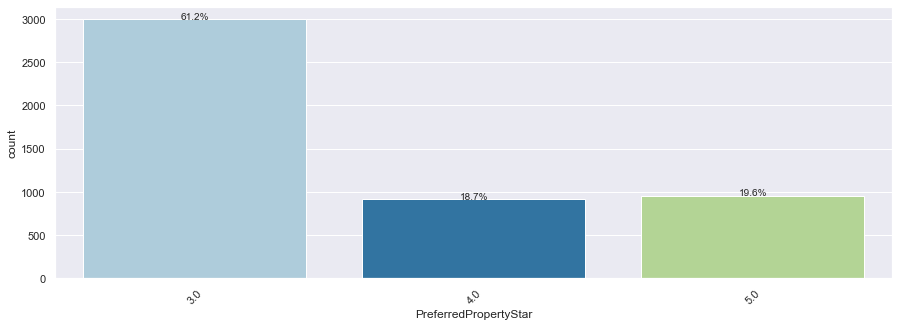

In [172]:
perc_on_bar(data,'PreferredPropertyStar')

This plot shows us that the majority of customers prefer a 3 star hotel at 61.2%, however some customers opt for more expensive options at 4 and 5 star hotel ratings representing 18.7% and 19.6% of customers respectively.

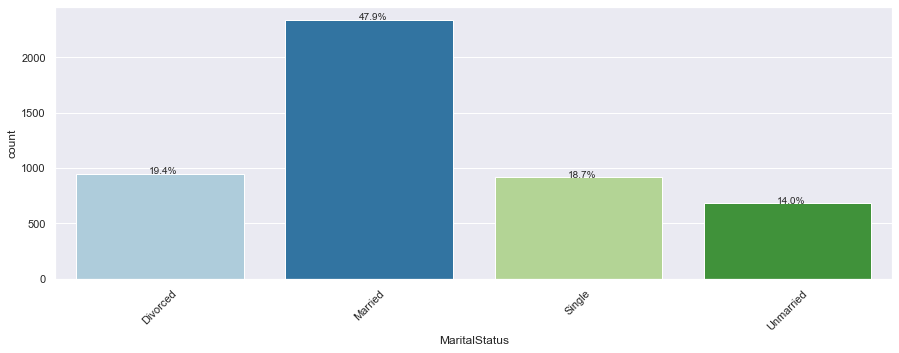

In [173]:
perc_on_bar(data,'MaritalStatus')

Most customer's are married representing 47.9% of the sample. Divorced represents 19.4%. Single accounts for 18.7% and Unmarried accounts for 14%. 

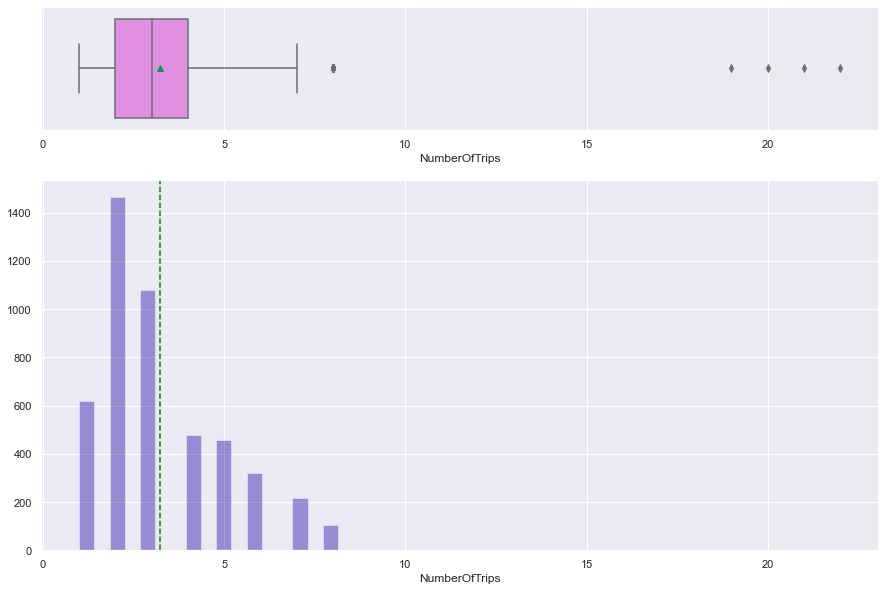

In [174]:
histogram_boxplot(data['NumberOfTrips'])

The NumberOfTrips column shows us the average number of trips per year by the customer. There is a slight skew in the data with the mean>median indicating a right/positive skewness. There appear to be some outliers on the upper end at over 1.5xIQR. The IQR can be approximated at 4-2 =2.... The major outliers occur at about 20. Since 1.5x2 =3, the major outliers are at about 7x the 1.5IQR boundary. These outliers may affect the boosting algorithms I intend to use (as models in the ensemble are based off of the residuals of the previous model in the ensemble). 

Because of this, outliers for this column will be capped.

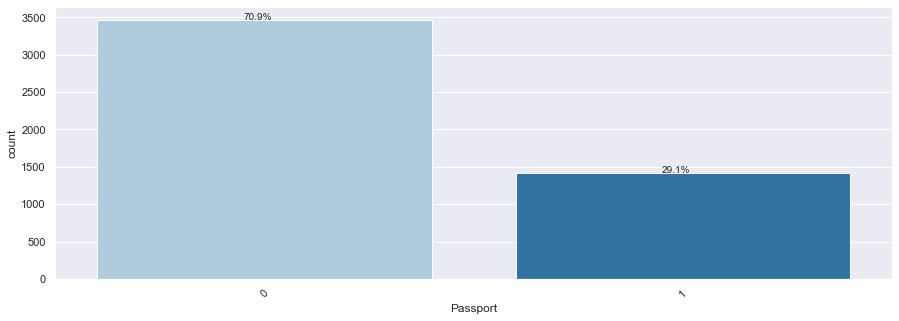

In [178]:
perc_on_bar(data,'Passport')

This shows us that 70.9% of the customers do not have a passport while 29.1% of customers do have a passport.

By indexing the data frame to only show people bought the package after hearing the pitch:

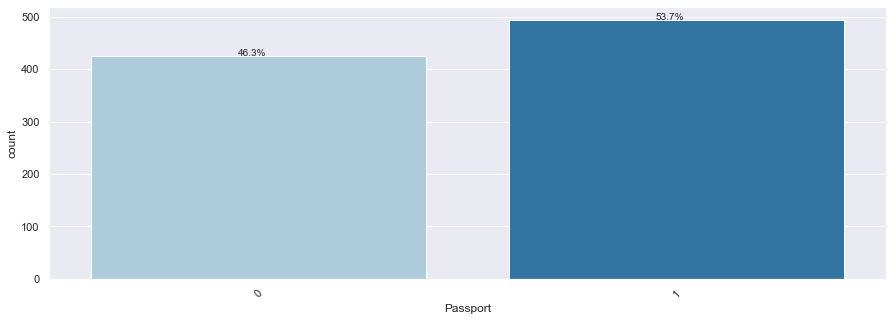

In [177]:
perc_on_bar(data[data['ProdTaken']==1],'Passport')

This shows us that 53.7% of the customers who bought a package have a passport. Comparing these 2 values tells a good story. The company isn't targeting potential customers very well. Many of the tourism packages probably require passports and not having a passport is a potential obstacle for these customers.

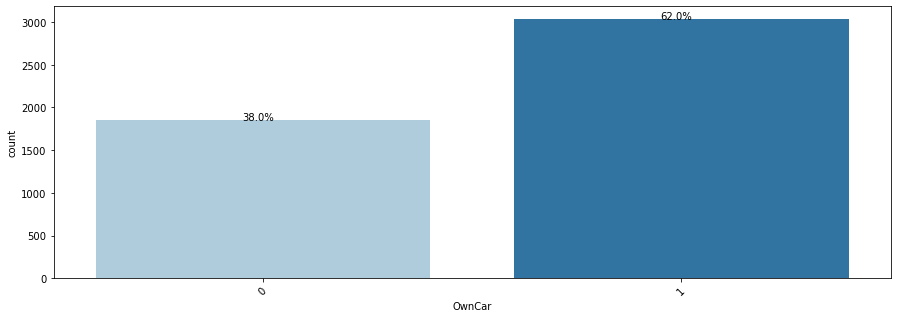

In [35]:
perc_on_bar(data,'OwnCar')

The OwnCar column shows us that 38.0% of customers do not own a car while 62.0% of customers do own a car.

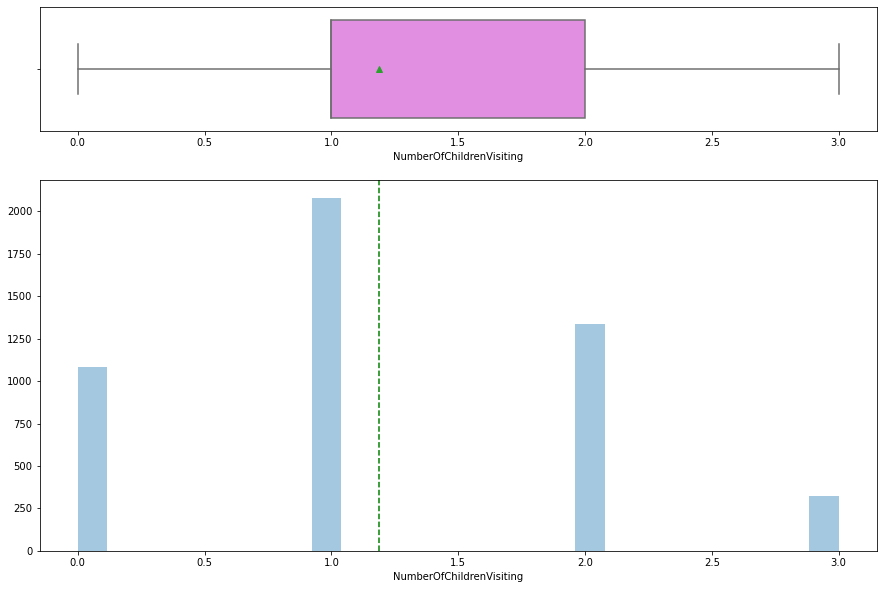

In [36]:
histogram_boxplot(data['NumberOfChildrenVisiting'])

The NumberOfChildrenVisiting column tells us how many children less than the age of 5 are planning to take the trip with the customer. There aren't any outliers here and the distribution seems relatively normal with minimal skew. Let's look at a bar plot to observe the relation between each column more easily.

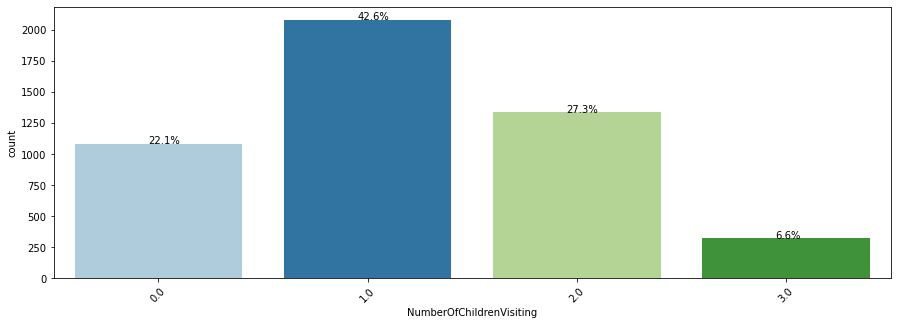

In [37]:
perc_on_bar(data,'NumberOfChildrenVisiting')

Most customers have either 1 or 2 children visiting with them at 42.6%  and 27.3% respectively. 6.6% of customers are bringing 3 or more children with them while 22.1% of customers are bringing no children below the age of 5 with them. 

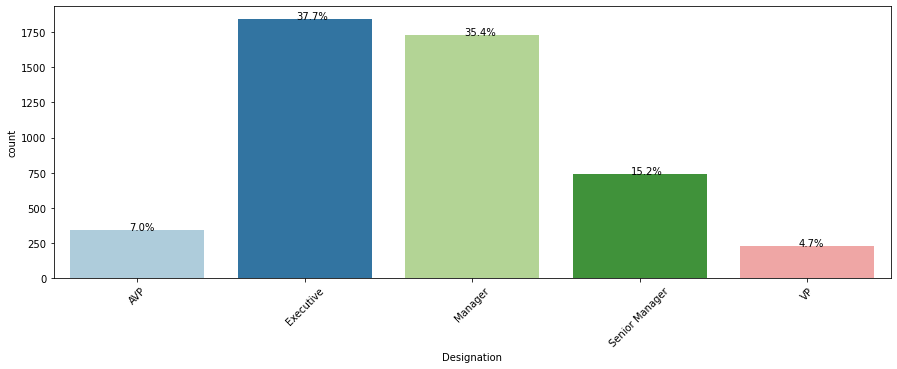

In [38]:
perc_on_bar(data,'Designation')

The Designation column in our data shows us that 37.7% of the customers are Executives, 35.4% of the customers are Managers, 15.2% of customers are Senior Managers, 7.0% are Assistant Vice Presidents, and 4.7% are Vice Presidents.

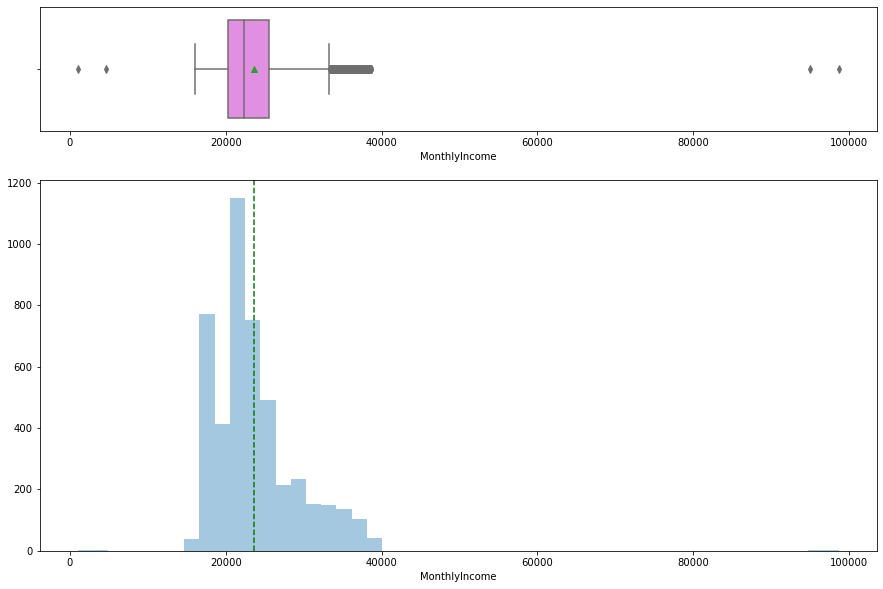

In [39]:
histogram_boxplot(data['MonthlyIncome'])

The Monthly Income column shows the Gross Monthly Income of the customer. The distribution of the data is skewed with mean>median indicating a positive/right skew. There are also some major outliers on both sides of the spectrum here. 

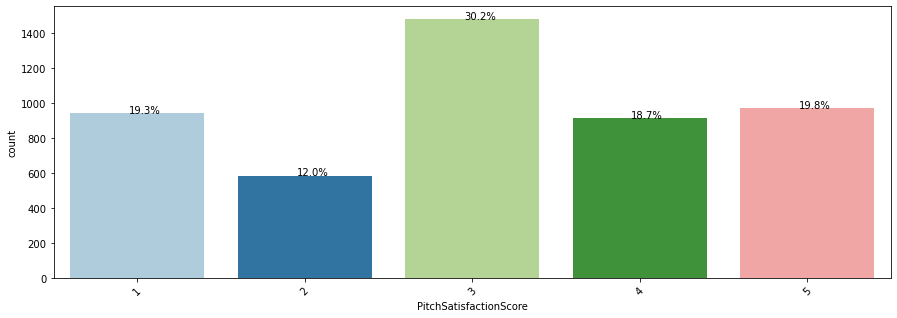

In [40]:
perc_on_bar(data,'PitchSatisfactionScore')

The PitchSatisfactionScore column shows us that most customers are averagely satisfied at 30.2% for the 3 rating. 18.7% were more than satisfied at 4, while 19.8% were exceptionally pleased with the pitch. 12.0% were relatively unsatisfied with the pitch rated at 2, while 19.3% were completely disatisfied with a rating of 1.

# Bivariate Analysis

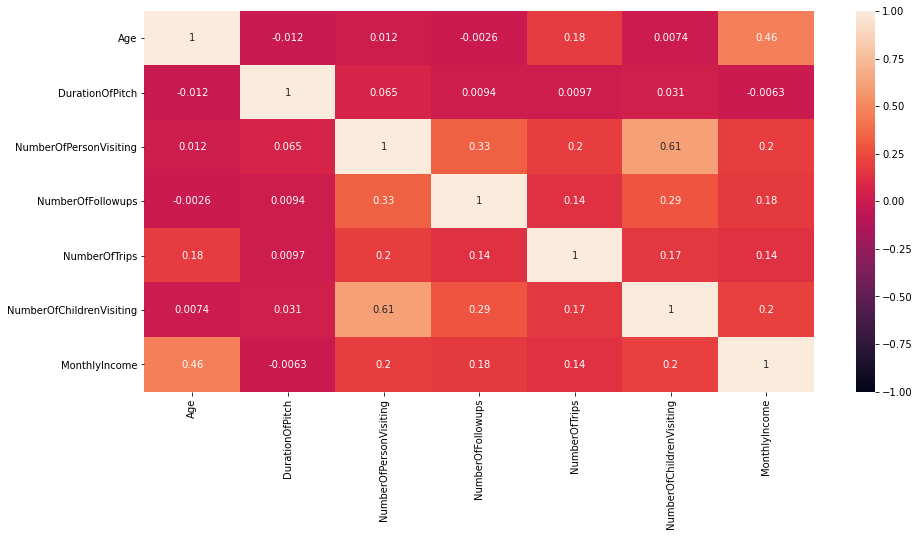

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

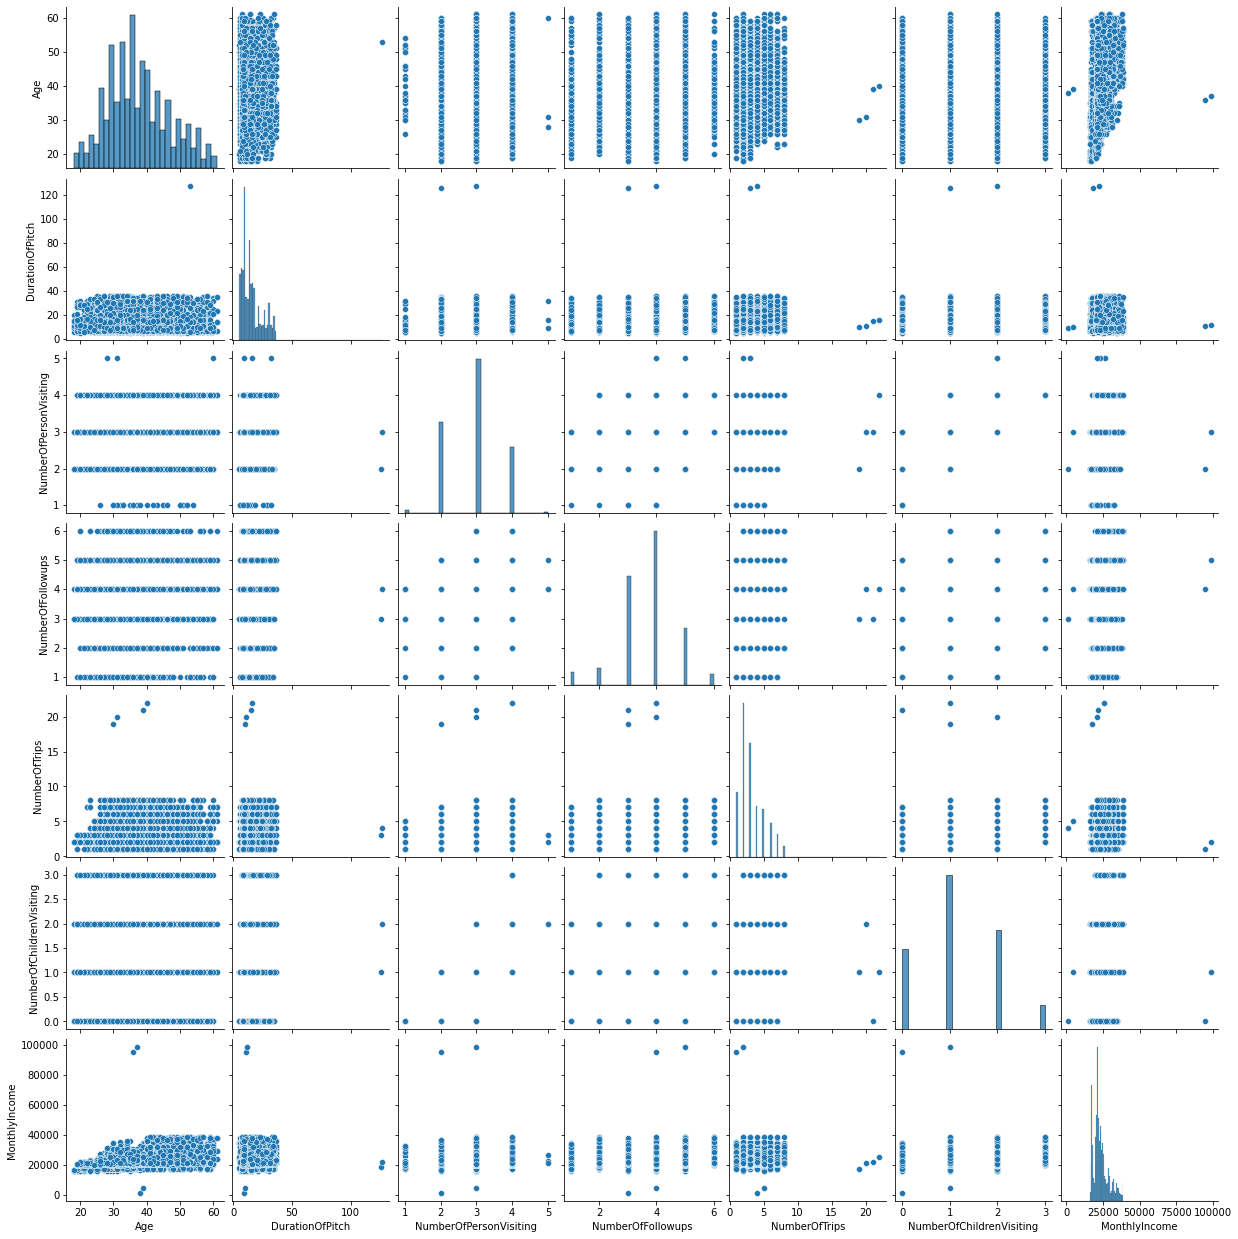

In [42]:
sns.pairplot(data=data.select_dtypes(np.number))
plt.show()

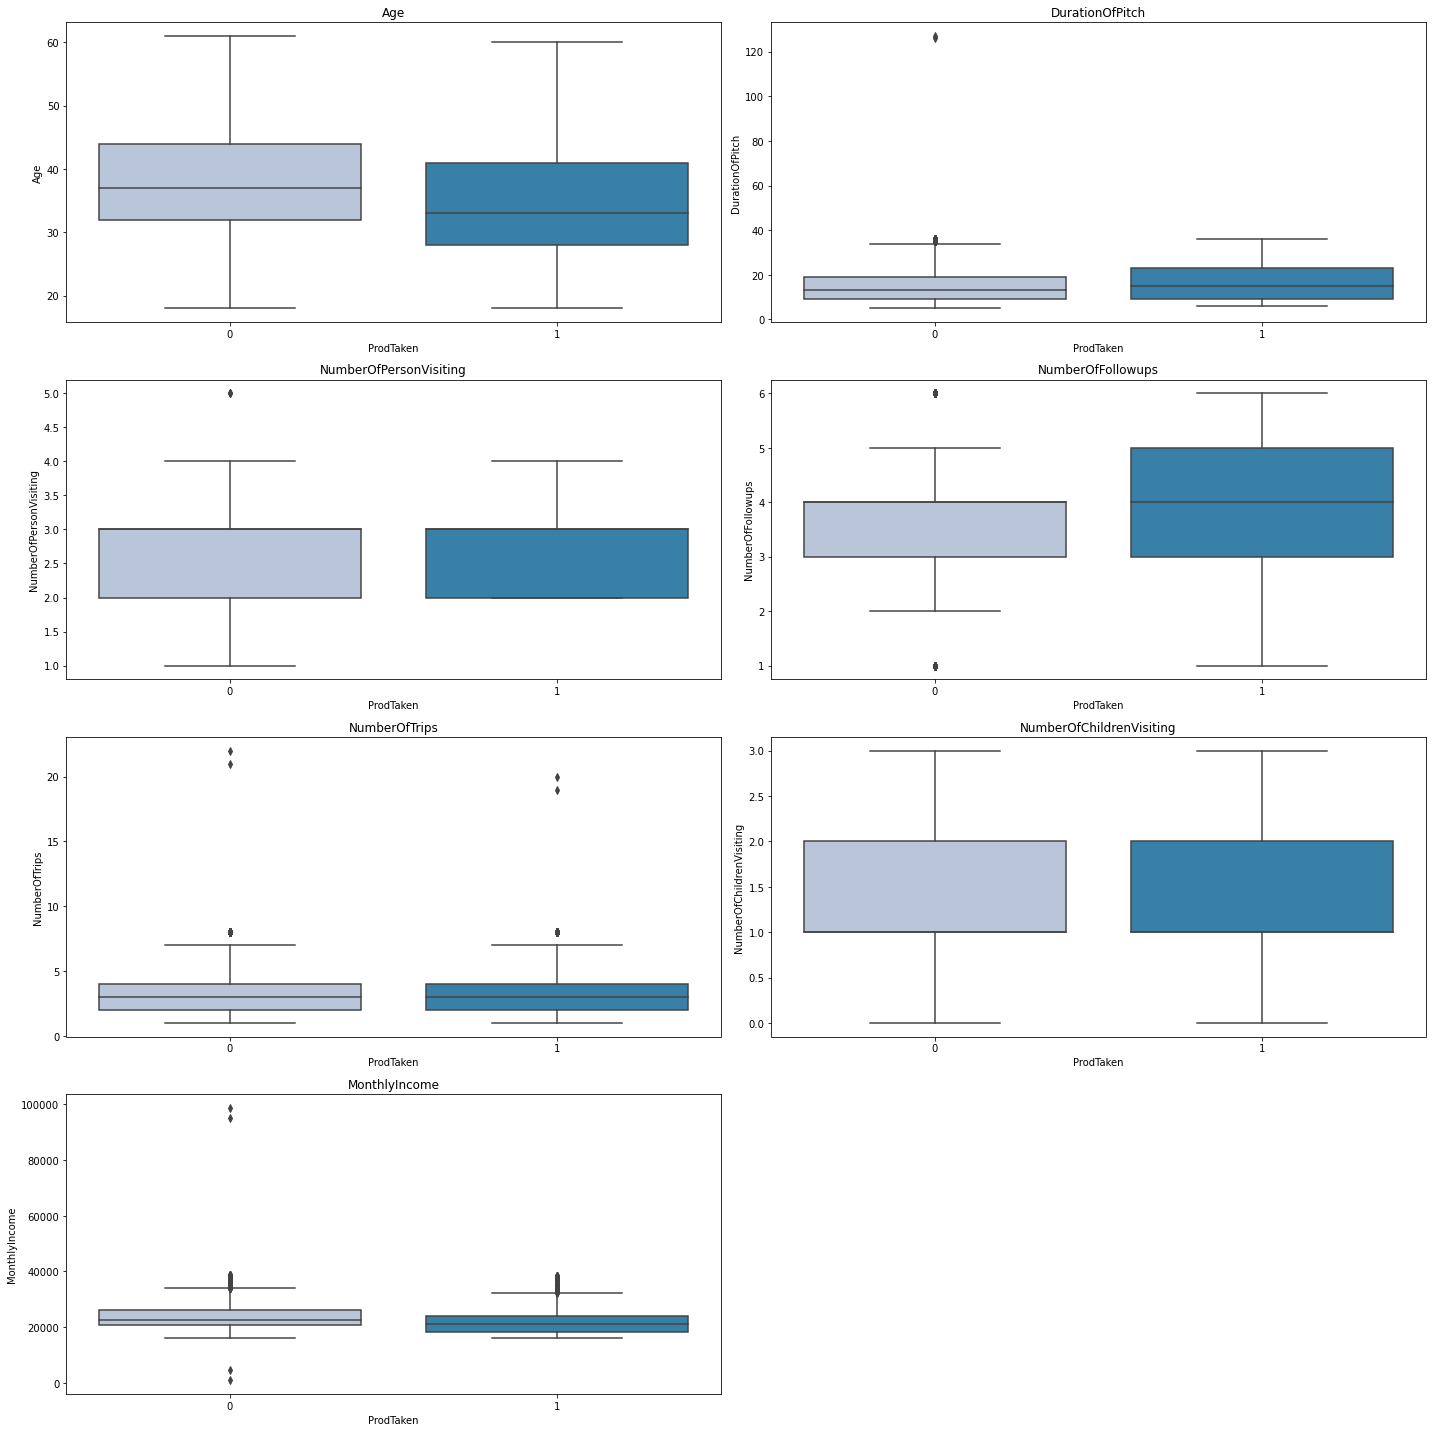

In [43]:
cols = data[['Age','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(20,20))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()


1. Age - Younger people accept the pitch more often.
2. DurationOfPitch - The median pitch duration is higher for those that buy the product, while some who don't buy the product can still occupy a tremendous amount of time and resources. 
3. NumberOfPersonVisiting - There is a larger spread in people who do not buy the product while people who do buy the product mostly bring 2 or 3 people with them.
4. NumberOfFollowups - People who buy the product had a greater number of follow ups
5. NumberOfTrips - Appears constant amongst target classes.
6. NumberOfChildrenVisiting - Appears constant amongst target classes.
7. MonthlyIncome - The monthly income of people who do not buy the product is actually higher than the monthly income of people who do buy the product, but only by a small amount. There are also more outliers present in the monthly income of people who do not buy the product. This could imply that richer people are pitched to more often, which could be the companies current marketing strategy.

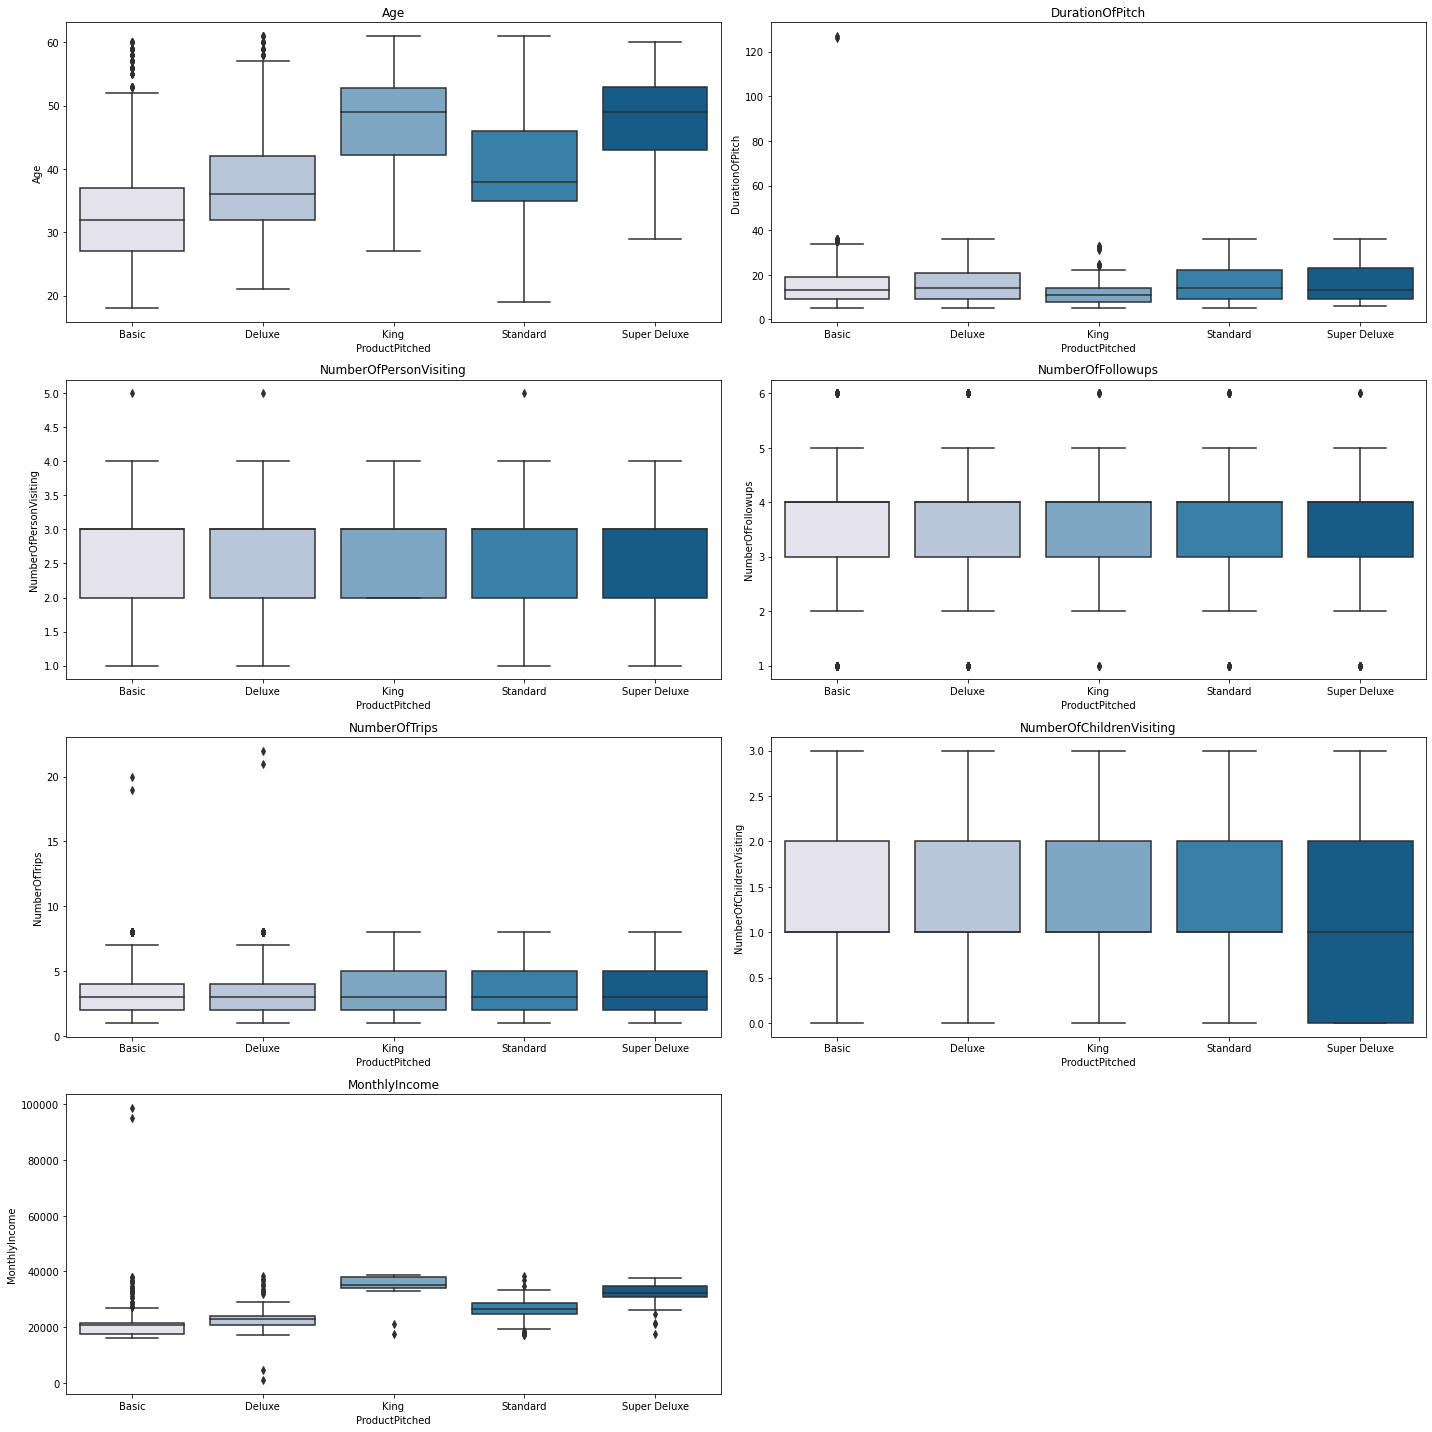

In [44]:
cols = data[['Age','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(20,20))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(data["ProductPitched"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

1. Age - 
    * The King and Super Deluxe packages are currently pitched mostly to people over the age of 40.
    * The Standard and Deluxe packages are currently pitched mostly to people between 30 and 45.
    * The Basic package is pitched to most of the younger customers.
2. DurationOfPitch - 
    * Pitches for the King Package appear to last the least amount of time. 
    * All other packages have comparable pitch durations.
3. NumberOfPersonVisiting - Consistent amongst packages pitched.
4. NumberOfFollowups - Consistent amongst packages pitched.
5. NumberOfTrips - 
    * The basic and Deluxe packages are pitched more to people who have taken fewer trips.
    * The other packages are consistent with eachother
6. NumberOfChildrenVisiting - 
    * The Super Deluxe is pitched to people who are bringing no children with them more than any other
    * The other packages are consistent with eachother.
7. MonthlyIncome - 
    * The King package is pitched most often to people with the highest income (~40k/month)
    * The Super Deluxe package is pitched most often to people with the second highest income (~35k/month)
    * The Standard package is pitched most often to people with the third highset income (~30k/month)
    * The Deluxe package is pitched most often to people with the fourth highest income (~25k/month)
    * The Basic package is pitched most often to people with the lowest income (~20k/month)

In [45]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken     0    1   All
Age                       
18.0          6    8    14
19.0         11   21    32
20.0         13   25    38
21.0         18   23    41
22.0         31   15    46
23.0         33   13    46
24.0         38   18    56
25.0         54   20    74
26.0         69   37   106
27.0        108   30   138
28.0        121   26   147
29.0        121   57   178
30.0        151   48   199
31.0        162   41   203
32.0        157   40   197
33.0        149   40   189
34.0        167   44   211
35.0        203   34   237
36.0        204   27   231
37.0        161   24   185
38.0        161   15   176
39.0        136   14   150
40.0        123   23   146
41.0        131   24   155
42.0        122   20   142
43.0        120   10   130
44.0         88   17   105
45.0         98   18   116
46.0        110   11   121
47.0         76   12    88
48.0         54   11    65
49.0         56    9    65
50.0         74   12    86
51.0         73   17    90
52.0         54   14    68
5

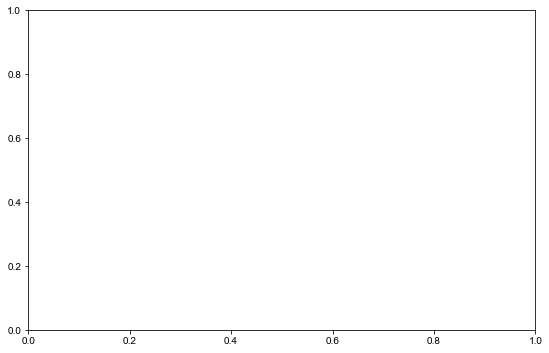

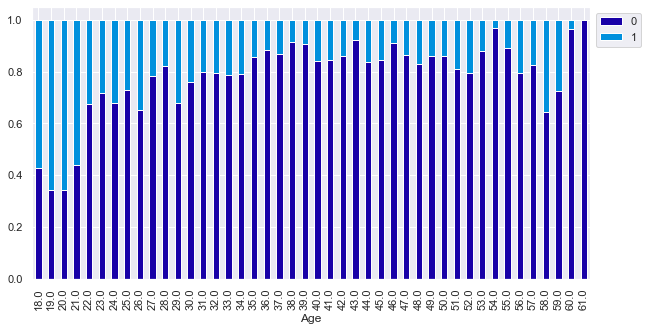

ProdTaken           0    1   All
DurationOfPitch                 
5.0                 6    0     6
6.0               268   39   307
7.0               294   48   342
8.0               273   60   333
9.0               404   79   483
10.0              199   45   244
11.0              168   37   205
12.0              162   33   195
13.0              191   32   223
14.0              212   41   253
15.0              217   52   269
16.0              218   56   274
17.0              148   24   172
18.0               56   19    75
19.0               36   21    57
20.0               46   19    65
21.0               57   16    73
22.0               66   23    89
23.0               58   21    79
24.0               54   16    70
25.0               59   14    73
26.0               60   12    72
27.0               58   14    72
28.0               44   17    61
29.0               53   21    74
30.0               65   30    95
31.0               52   31    83
32.0               59   15    74
33.0      

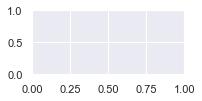

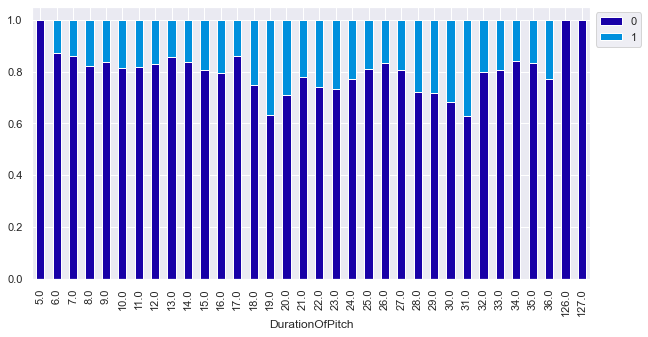

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


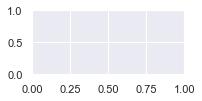

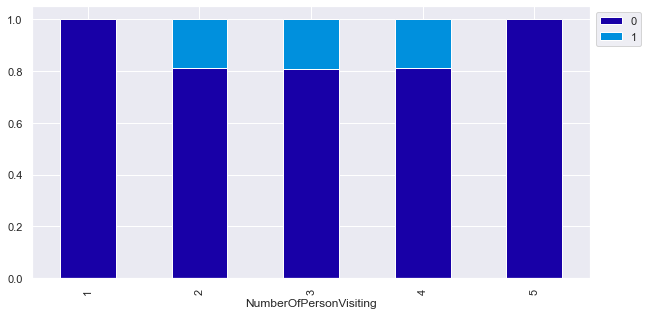

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1689  379  2068
5.0                 577  191   768
6.0                  82   54   136
All                3931  912  4843
------------------------------------------------------------------------------------------------------------------------


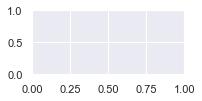

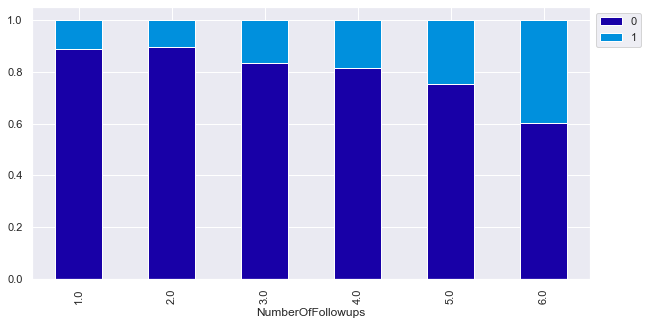

ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1165  299  1464
3.0             862  217  1079
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3840  908  4748
------------------------------------------------------------------------------------------------------------------------


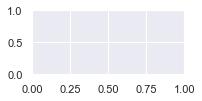

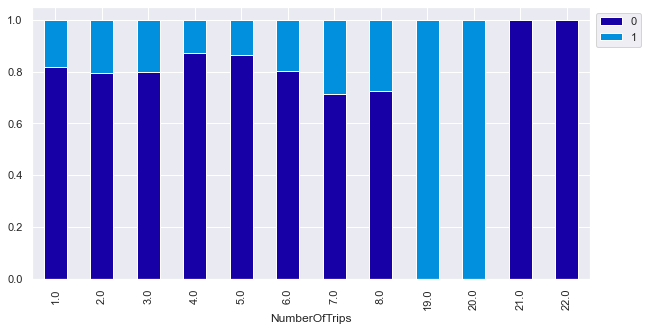

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
0.0                        880  202  1082
1.0                       1688  392  2080
2.0                       1082  253  1335
3.0                        259   66   325
All                       3909  913  4822
------------------------------------------------------------------------------------------------------------------------


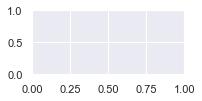

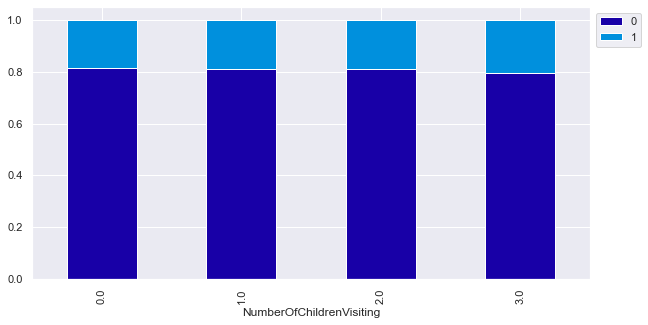

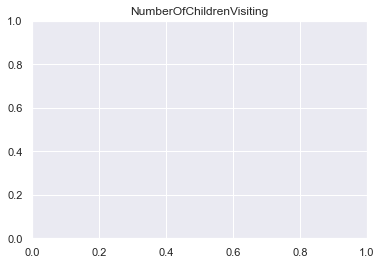

In [46]:
cols = data[['Age','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting']].columns.tolist()
plt.figure(figsize=(20,20))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     stacked_plot(data[variable])
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

1. Age - Younger people accept the pitch more often. People at the retiring age also have increased pitch acceptance.
    * People aged 18-30 accept much more.
    * There is another spike between the ages of 55-60.
2. DurationOfPitch - The median pitch duration is higher for those that buy the product, while some who don't buy the product can still occupy a tremendous amount of time and resources.
3. NumberOfPersonVisiting - There is a larger spread in people who do not buy the product while people who do buy the product mostly bring 2 or 3 people with them.
    * The largest and smallest groups (groups of 2 and 6) have no accepted a pitches amongst them.
4. NumberOfFollowups - People who buy the product had a greater number of follow ups
    * Follow up conversations appear to be a driving factor in pitch acceptance
5. NumberOfTrips - Appears constant amongst target classes and values.
    * When the number of trips per year is high for a customer, pitch acceptance is unpredictable.
    * People who take between 6 and 8 trips per year appear to accept the pitch more often, but only by about 10%.
6. NumberOfChildrenVisiting - Appears constant amongst target classes.
7. MonthlyIncome - The monthly income of people who do not buy the product is actually higher than the monthly income of people who do buy the product, but only by a small amount. There are also more outliers present in the monthly income of people who do not buy the product. This could imply that richer people are pitched to more often, which could be the companies current marketing strategy.

In [47]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot1(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['ProductPitched'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['ProductPitched'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
ProdTaken                                                        
0                1290    1528   210       618           322  3968
1                 552     204    20       124            20   920
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


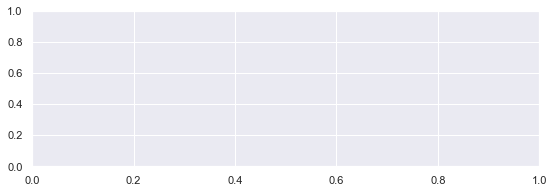

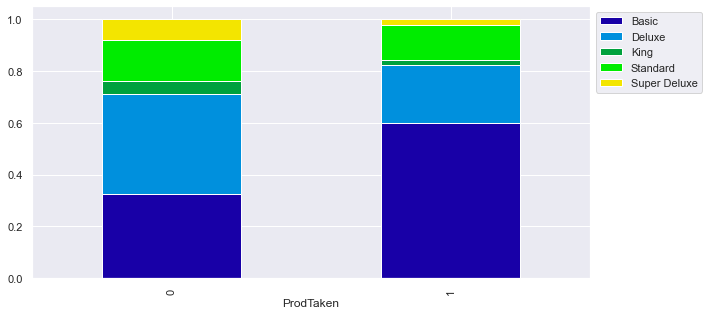

ProductPitched   Basic  Deluxe  King  Standard  Super Deluxe   All
TypeofContact                                                     
Company Invited    516     541    48       218            96  1419
Self Enquiry      1316    1176   182       524           246  3444
All               1832    1717   230       742           342  4863
------------------------------------------------------------------------------------------------------------------------


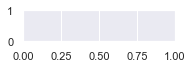

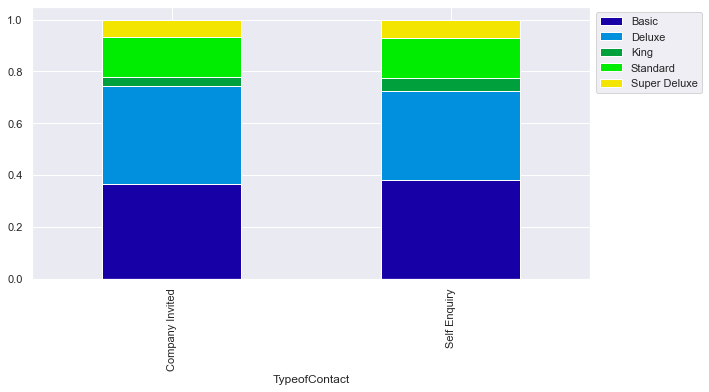

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
CityTier                                                         
1                1466     908   168       436           212  3190
2                 108      40    22        18            10   198
3                 268     784    40       288           120  1500
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


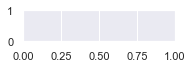

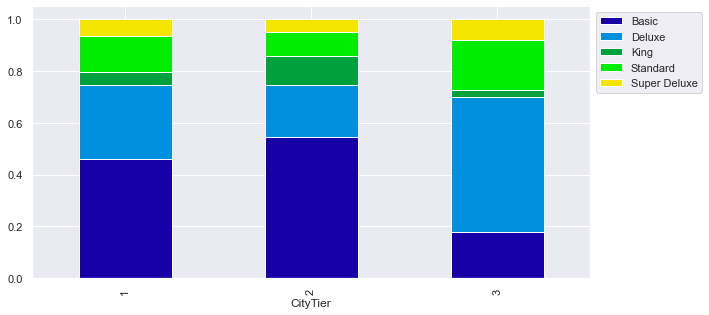

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Occupation                                                       
Free Lancer         2       0     0         0             0     2
Large Business    196     124    12        84            18   434
Salaried          924     818   114       338           174  2368
Small Business    720     790   104       320           150  2084
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


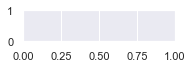

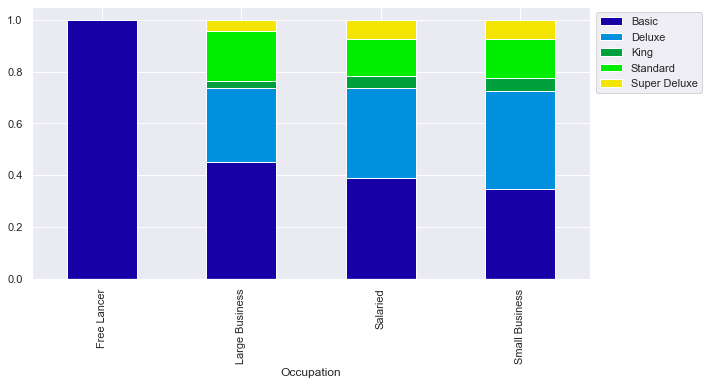

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Gender                                                           
Female            680     724    82       326           160  1972
Male             1162    1008   148       416           182  2916
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


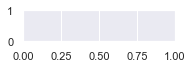

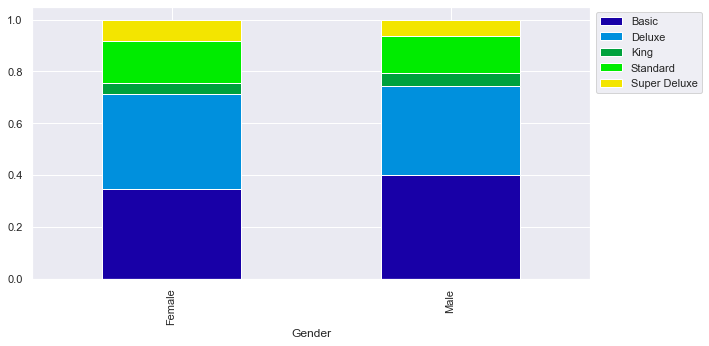

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
ProductPitched                                                   
Basic            1842       0     0         0             0  1842
Deluxe              0    1732     0         0             0  1732
King                0       0   230         0             0   230
Standard            0       0     0       742             0   742
Super Deluxe        0       0     0         0           342   342
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


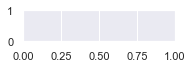

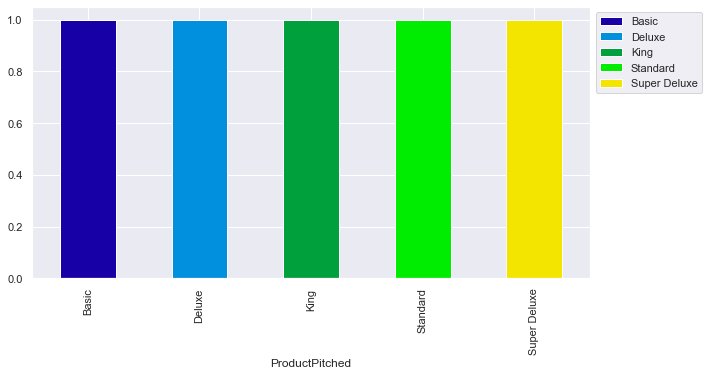

ProductPitched         Basic  Deluxe  King  Standard  Super Deluxe   All
PreferredPropertyStar                                                   
3.0                     1118    1090   137       436           212  2993
4.0                      368     312    41       130            62   913
5.0                      355     329    29       175            68   956
All                     1841    1731   207       741           342  4862
------------------------------------------------------------------------------------------------------------------------


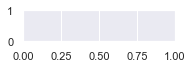

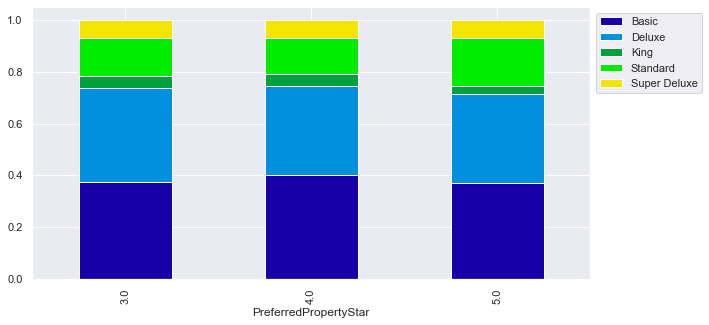

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
MaritalStatus                                                    
Divorced          332     336    52       142            88   950
Married           816     852   126       380           166  2340
Single            511     221    52        50            82   916
Unmarried         183     323     0       170             6   682
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


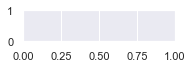

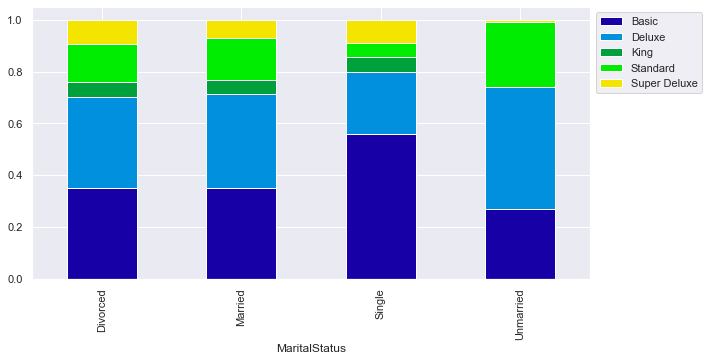

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Passport                                                         
0                1274    1252   170       532           238  3466
1                 568     480    60       210           104  1422
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


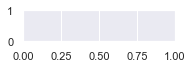

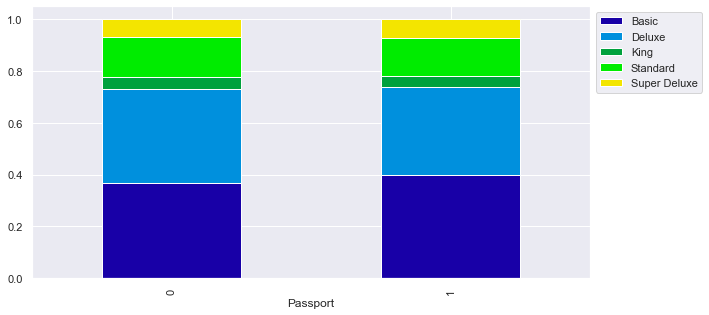

ProductPitched          Basic  Deluxe  King  Standard  Super Deluxe   All
PitchSatisfactionScore                                                   
1                         358     352    40       146            46   942
2                         204     220    34       102            26   586
3                         550     552    48       202           126  1478
4                         390     280    50       144            48   912
5                         340     328    58       148            96   970
All                      1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


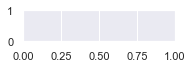

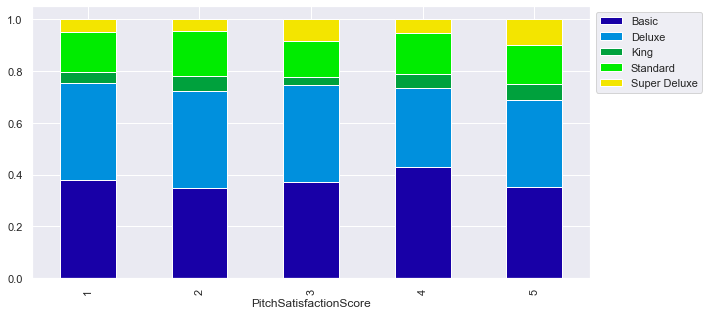

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
OwnCar                                                           
0                 758     674    64       258           102  1856
1                1084    1058   166       484           240  3032
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


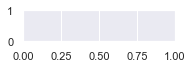

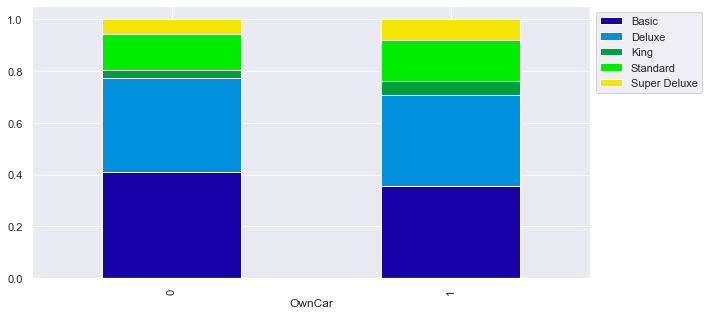

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Designation                                                      
AVP                 0       0     0         0           342   342
Executive        1842       0     0         0             0  1842
Manager             0    1732     0         0             0  1732
Senior Manager      0       0     0       742             0   742
VP                  0       0   230         0             0   230
All              1842    1732   230       742           342  4888
------------------------------------------------------------------------------------------------------------------------


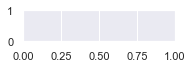

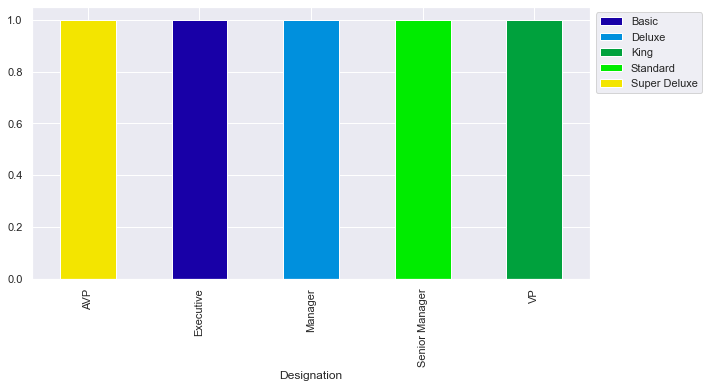

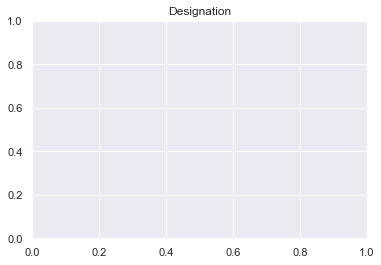

In [48]:
cols = data.select_dtypes(['category'])
plt.figure(figsize=(20,20))

for i, variable in enumerate(cols):
                     plt.subplot(6,2,i+1)
                     stacked_plot1(data[variable])
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

1. ProdTaken - 
    * The basic package is the only package accepted more often than it is declined.
    * This could indicate a bad marketing strategy that affects the companies niche products the most.
2. TypeofContact - Appears constant amongst products pitched
3. CityTier - 
    * The Basic package is pitched most to people in Tier 2 City followed by Tier 1 and then tier 3
    * The Deluxe package is pitched most to people in tier 3 city, followed by tier 1 and then tier 2
    * The King package is pitched most to people in Tier 2 City followed by Tier 1 and then tier 3
    * The Standard package is pitched most to people in tier 3 city, followed by tier 1 and then tier 2
    * The Super Deluxe package is pitched most to people in tier 3 city, followed by tier 1 and then tier 2
4. Occupation - 
    * Free Lancers are exclusively offered the basic package
    * The Basic package is pitched most to customers from a large buisness
    * The Deluxe package is pitched most to customers from a small buisness
    * The King package is pitched most to customers from a small buisness
    * The super Deluxe is pitched the most to both customers from small buisness and salaried customers.
5. Gender - Does not appear to have an effect on the product pitched
6. PreferredPropertyStar - Has minimal effect
    * The standard package does appear to be pitched more to people who desire a 5 star property to vacation at
7. Marital Status - 
    * The basic package is most often pitched to single people
    * The Deluxe package is most often pitched to unmarried people
    * Unmarried people are not pitched the King package and only rarely the super deluxe package
    * Other an the above, the king is equally pitched
    * The Standard Package is most often pitched to unmarried people closely followed by married people
    * The Super deluxe is almost equally pitched most often to divorced and single people.
8. PassPort - No variation amongst product pitched
9. PitchSatisfactionScore - Seems completely random
10. OwnCar - People pitched the king, standard, and super deluxe own a car more often than not.
11. Designation - THE CURRENT MARKETING STRATEGY OF THE FIRM APPEARS TO BE THIS:
    * IF THE PERSON'S DESIGNATION IS AVP, PITCH SUPER DELUXE
    * IF THE PERSON'S DESIGNATION IS EXECUTIVE, PITCH BASIC
    * IF THE PERSON'S DESIGNATION IS MANAGER, PITCH DELUXE
    * IF THE PERSON'S DESIGNATION IS SENIOR MANAGER, PITCH STANDARD
    * IF THE PERSON'S DESIGNATION IS VP, PITCH KING

### Let's try the same plots but only plot instances where the customer bought the travel package they were pitched

In [181]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot2(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data[data['ProdTaken']==1]['ProductPitched'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data[data['ProdTaken']==1]['ProductPitched'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe  All
ProdTaken                                                       
1                 552     204    20       124            20  920
All               552     204    20       124            20  920
------------------------------------------------------------------------------------------------------------------------


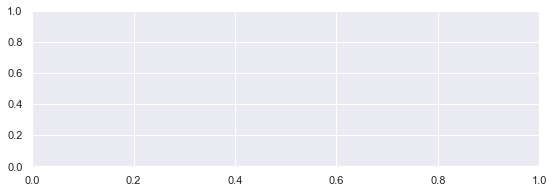

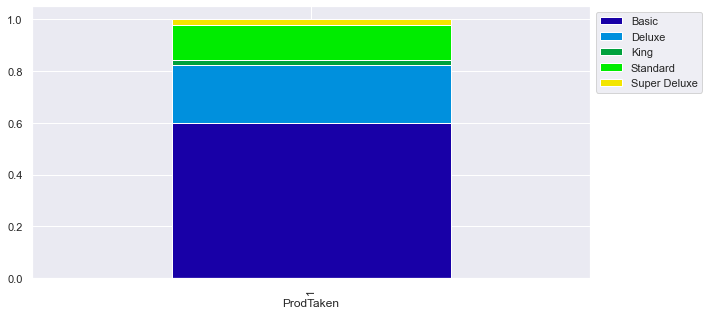

ProductPitched   Basic  Deluxe  King  Standard  Super Deluxe  All
TypeofContact                                                    
Company Invited    194      68     0        32            16  310
Self Enquiry       355     136    20        92             4  607
All                549     204    20       124            20  917
------------------------------------------------------------------------------------------------------------------------


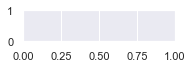

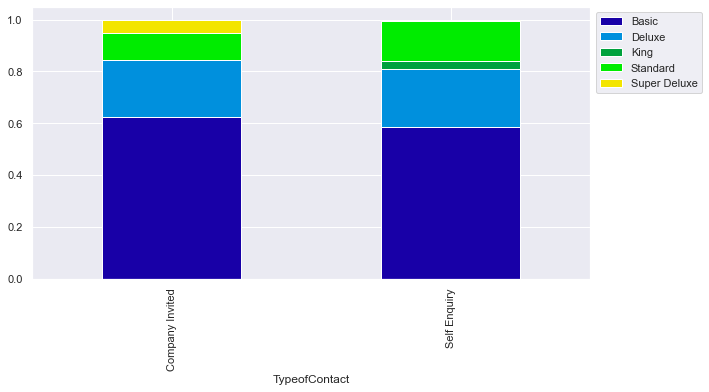

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe  All
CityTier                                                        
1                 392      60    12        52             4  520
2                  38       0     0         8             0   46
3                 122     144     8        64            16  354
All               552     204    20       124            20  920
------------------------------------------------------------------------------------------------------------------------


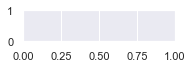

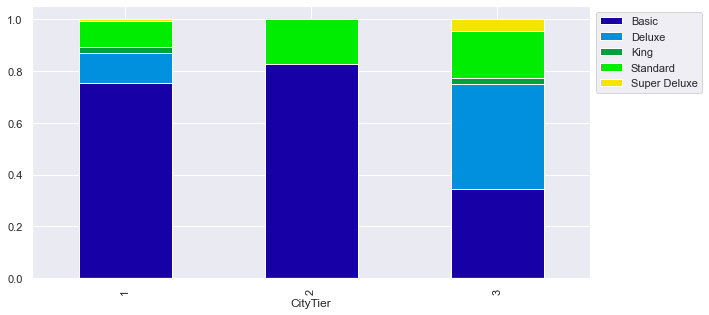

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe  All
Occupation                                                      
Free Lancer         2       0     0         0             0    2
Large Business     88      16     4        12             0  120
Salaried          260      80     4        54            16  414
Small Business    202     108    12        58             4  384
All               552     204    20       124            20  920
------------------------------------------------------------------------------------------------------------------------


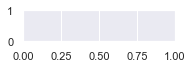

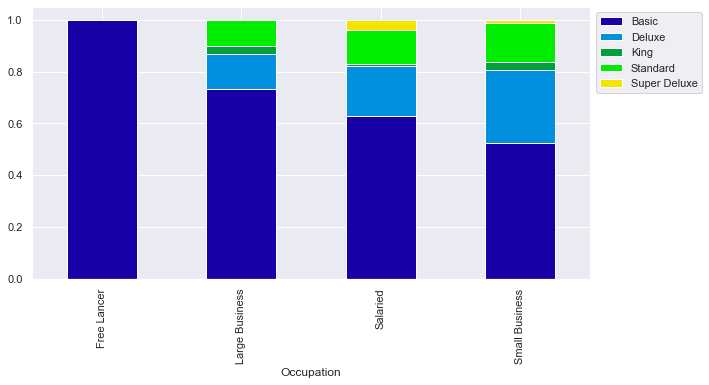

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe  All
Gender                                                          
Female            208      70    12        48             4  342
Male              344     134     8        76            16  578
All               552     204    20       124            20  920
------------------------------------------------------------------------------------------------------------------------


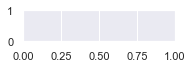

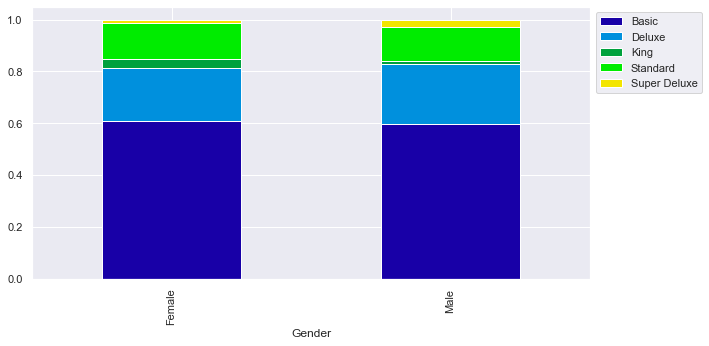

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe  All
ProductPitched                                                  
Basic             552       0     0         0             0  552
Deluxe              0     204     0         0             0  204
King                0       0    20         0             0   20
Standard            0       0     0       124             0  124
Super Deluxe        0       0     0         0            20   20
All               552     204    20       124            20  920
------------------------------------------------------------------------------------------------------------------------


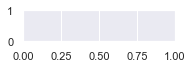

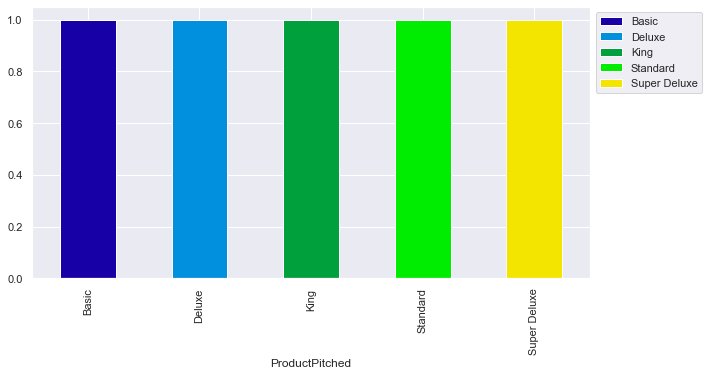

ProductPitched         Basic  Deluxe  King  Standard  Super Deluxe  All
PreferredPropertyStar                                                  
3.0                      282     114     6        68            12  482
4.0                      114      36     8        20             4  182
5.0                      156      53     2        35             4  250
All                      552     203    16       123            20  914
------------------------------------------------------------------------------------------------------------------------


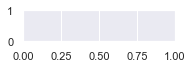

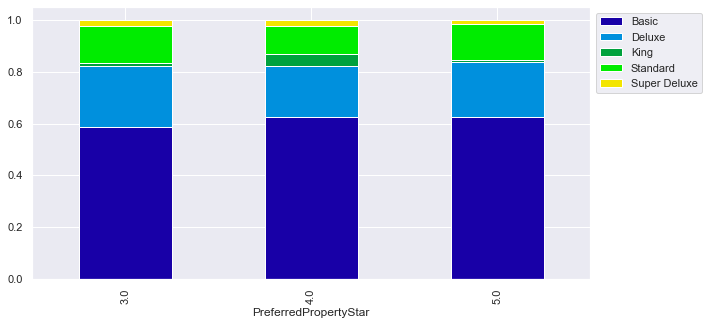

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe  All
MaritalStatus                                                   
Divorced           60      32     6        26             0  124
Married           188      68     6        56             8  326
Single            230      45     8        11            10  304
Unmarried          74      59     0        31             2  166
All               552     204    20       124            20  920
------------------------------------------------------------------------------------------------------------------------


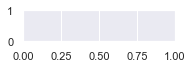

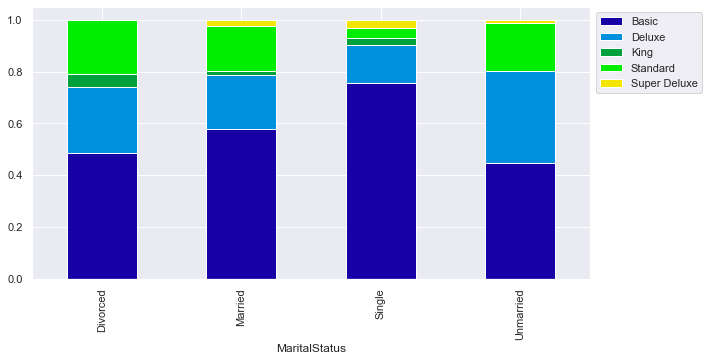

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe  All
Passport                                                        
0                 230     104     8        76             8  426
1                 322     100    12        48            12  494
All               552     204    20       124            20  920
------------------------------------------------------------------------------------------------------------------------


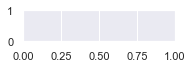

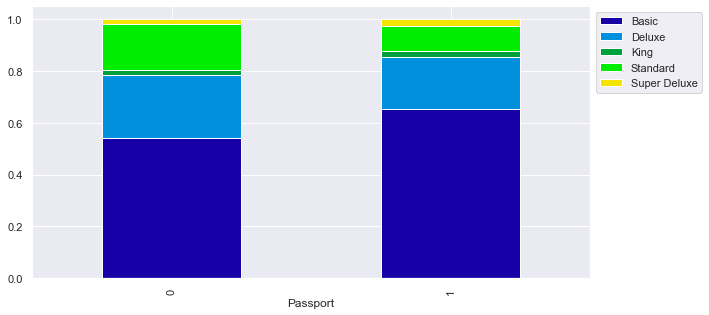

ProductPitched          Basic  Deluxe  King  Standard  Super Deluxe  All
PitchSatisfactionScore                                                  
1                          94      34     2        14             0  144
2                          50      26     2        10             0   88
3                         178      76     8        42            12  316
4                         104      34     4        20             0  162
5                         126      34     4        38             8  210
All                       552     204    20       124            20  920
------------------------------------------------------------------------------------------------------------------------


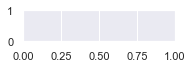

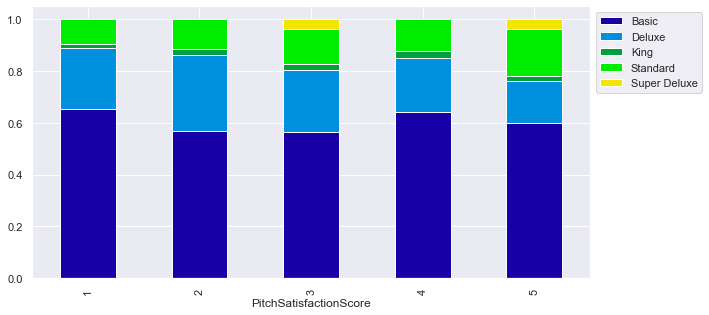

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe  All
OwnCar                                                          
0                 236      80     2        42             0  360
1                 316     124    18        82            20  560
All               552     204    20       124            20  920
------------------------------------------------------------------------------------------------------------------------


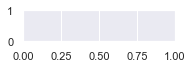

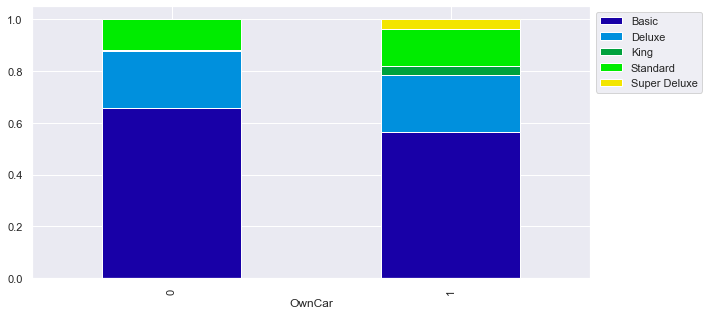

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe  All
Designation                                                     
AVP                 0       0     0         0            20   20
Executive         552       0     0         0             0  552
Manager             0     204     0         0             0  204
Senior Manager      0       0     0       124             0  124
VP                  0       0    20         0             0   20
All               552     204    20       124            20  920
------------------------------------------------------------------------------------------------------------------------


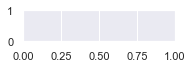

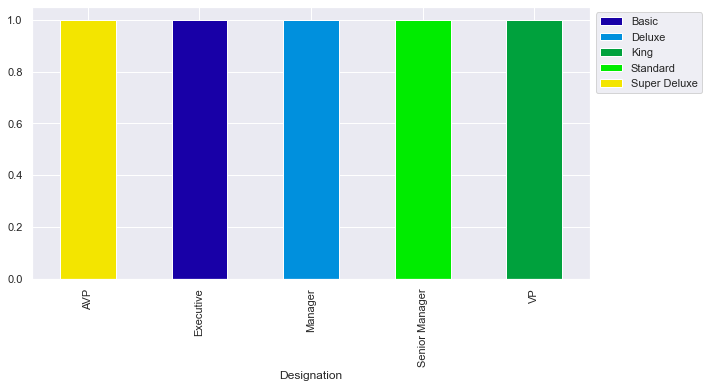

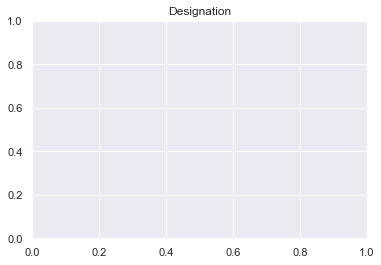

In [183]:
cols = data.select_dtypes(['category'])
plt.figure(figsize=(20,20))

for i, variable in enumerate(cols):
                     plt.subplot(6,2,i+1)
                     stacked_plot1(data[data['ProdTaken']==1][variable])
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

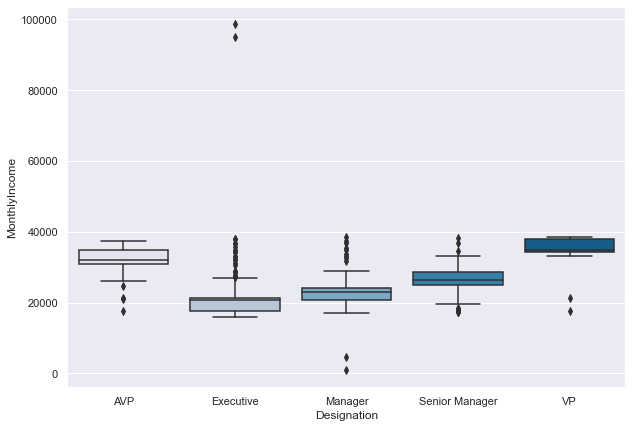

In [49]:
### Function to plot boxplot
def boxplot2(x):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=data, x="Designation",y=data[x],palette="PuBu")
    plt.show()
boxplot2('MonthlyIncome')

The above plot shows that there are different monthly income brackets for people in each designation. This makes it so that monthly income missing values can be imputed more accurately by using designation specific averages to impute.

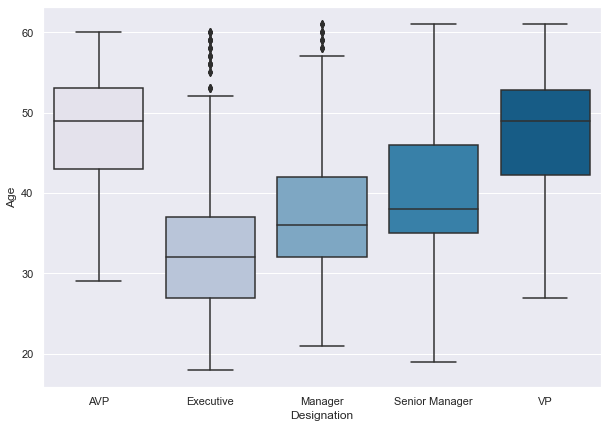

In [50]:
boxplot2('Age')

Here, we can see how age varies with designation. The youngest people are Executives and the oldest people are AVP and VP. Managers and Senior managers occupy the majority of the age gap between the two.

# Insights from Exploratory Data Analysis

All insights will be placed here so they are in one place:

1. Age - Younger people accept the pitch more often.
2. DurationOfPitch - The median pitch duration is higher for those that buy the product, while some who don't buy the product can still occupy a tremendous amount of time and resources. 
3. NumberOfPersonVisiting - There is a larger spread in people who do not buy the product while people who do buy the product mostly bring 2 or 3 people with them.
4. NumberOfFollowups - People who buy the product had a greater number of follow ups
5. NumberOfTrips - Appears constant amongst target classes.
6. NumberOfChildrenVisiting - Appears constant amongst target classes.
7. MonthlyIncome - The monthly income of people who do not buy the product is actually higher than the monthly income of people who do buy the product, but only by a small amount. There are also more outliers present in the monthly income of people who do not buy the product. This could imply that richer people are pitched to more often, which could be the companies current marketing strategy.

1. Age - 
    * The King and Super Deluxe packages are currently pitched mostly to people over the age of 40.
    * The Standard and Deluxe packages are currently pitched mostly to people between 30 and 45.
    * The Basic package is pitched to most of the younger customers.
2. DurationOfPitch - 
    * Pitches for the King Package appear to last the least amount of time. 
    * All other packages have comparable pitch durations.
3. NumberOfPersonVisiting - Consistent amongst packages pitched.
4. NumberOfFollowups - Consistent amongst packages pitched.
5. NumberOfTrips - 
    * The basic and Deluxe packages are pitched more to people who have taken fewer trips.
    * The other packages are consistent with eachother
6. NumberOfChildrenVisiting - 
    * The Super Deluxe is pitched to people who are bringing no children with them more than any other
    * The other packages are consistent with eachother.
7. MonthlyIncome - 
    * The King package is pitched most often to people with the highest income (~40k/month)
    * The Super Deluxe package is pitched most often to people with the second highest income (~35k/month)
    * The Standard package is pitched most often to people with the third highset income (~30k/month)
    * The Deluxe package is pitched most often to people with the fourth highest income (~25k/month)
    * The Basic package is pitched most often to people with the lowest income (~20k/month)

1. Age - Younger people accept the pitch more often. People at the retiring age also have increased pitch acceptance.
    * People aged 18-30 accept much more.
    * There is another spike between the ages of 55-60.
2. DurationOfPitch - The median pitch duration is higher for those that buy the product, while some who don't buy the product can still occupy a tremendous amount of time and resources.
3. NumberOfPersonVisiting - There is a larger spread in people who do not buy the product while people who do buy the product mostly bring 2 or 3 people with them.
    * The largest and smallest groups (groups of 2 and 6) have no accepted a pitches amongst them.
4. NumberOfFollowups - People who buy the product had a greater number of follow ups
    * Follow up conversations appear to be a driving factor in pitch acceptance
5. NumberOfTrips - Appears constant amongst target classes and values.
    * When the number of trips per year is high for a customer, pitch acceptance is unpredictable.
    * People who take between 6 and 8 trips per year appear to accept the pitch more often, but only by about 10%.
6. NumberOfChildrenVisiting - Appears constant amongst target classes.
7. MonthlyIncome - The monthly income of people who do not buy the product is actually higher than the monthly income of people who do buy the product, but only by a small amount. There are also more outliers present in the monthly income of people who do not buy the product. This could imply that richer people are pitched to more often, which could be the companies current marketing strategy.




1. ProdTaken - 
    * The basic package is the only package accepted more often than it is declined.
    * This could indicate a bad marketing strategy that affects the companies niche products the most.
2. TypeofContact - Appears constant amongst products pitched
3. CityTier - 
    * The Basic package is pitched most to people in Tier 2 City followed by Tier 1 and then tier 3
    * The Deluxe package is pitched most to people in tier 3 city, followed by tier 1 and then tier 2
    * The King package is pitched most to people in Tier 2 City followed by Tier 1 and then tier 3
    * The Standard package is pitched most to people in tier 3 city, followed by tier 1 and then tier 2
    * The Super Deluxe package is pitched most to people in tier 3 city, followed by tier 1 and then tier 2
4. Occupation - 
    * Free Lancers are exclusively offered the basic package
    * The Basic package is pitched most to customers from a large buisness
    * The Deluxe package is pitched most to customers from a small buisness
    * The King package is pitched most to customers from a small buisness
    * The super Deluxe is pitched the most to both customers from small buisness and salaried customers.
5. Gender - Does not appear to have an effect on the product pitched
6. PreferredPropertyStar - Has minimal effect
    * The standard package does appear to be pitched more to people who desire a 5 star property to vacation at
7. Marital Status - 
    * The basic package is most often pitched to single people
    * The Deluxe package is most often pitched to unmarried people
    * Unmarried people are not pitched the King package and only rarely the super deluxe package
    * Other an the above, the king is equally pitched
    * The Standard Package is most often pitched to unmarried people closely followed by married people
    * The Super deluxe is almost equally pitched most often to divorced and single people.
8. PassPort - No variation amongst product pitched
9. PitchSatisfactionScore - Seems completely random
10. OwnCar - People pitched the king, standard, and super deluxe own a car more often than not.
11. Designation - THE CURRENT MARKETING STRATEGY OF THE FIRM APPEARS TO BE THIS:
    * IF THE PERSON'S DESIGNATION IS AVP, PITCH SUPER DELUXE
    * IF THE PERSON'S DESIGNATION IS EXECUTIVE, PITCH BASIC
    * IF THE PERSON'S DESIGNATION IS MANAGER, PITCH DELUXE
    * IF THE PERSON'S DESIGNATION IS SENIOR MANAGER, PITCH STANDARD
    * IF THE PERSON'S DESIGNATION IS VP, PITCH KING




### Customer Profiling / package:

King/Super Deluxe: These packages appeal to the wealthiest customers, which are in general also older customers. People who are marketed the super deluxe instead of the king package are generally not accompanied by children. These customers spend the least amount of time in the pitch and either want it or they don't. Unmarried people are generally not pitched this package.


Deluxe/ Standard: These Packages appeal to the next wealth bracket down from the king/super deluxe. You are more likely to be pitched the deluxe if you have taken fewer trips. These customers occupy a middle age bracket as well. Most couples are pitched this package, wether they are married or not. 


Basic - This is the most pitched package. Younger people appeal most to this package out of the rest, but this package is still purchased by the other age groups as well. These people are most often single.






# Data Pre-processing

1. Missing Value Treatment
2. Outlier Treatment
3. Feature Engineering
4. Scaling and other preparations for modelling

### Missing Value Treatment

Missing values are present in the following columns:

In [51]:
#obtaining a missing value count per column and sorting it.
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

There are 8 columns with missing values that must be filled or removed for modelling.
Here, I will summarize the treatment done per column.
1. DurationOfPitch - A continuous variable whose missing values will be imputed as the mean
2. MonthlyIncome - A Continuous variable whose missing values will be imputed as the mean/ Designation
3. Age - A Continuous variable whose missing values will be imputed as the mean/designation
4. NumberOfTrips - The mean
5. NumberOfChildrenVisiting - The mean
6. NumberOfFollowups - The mean will be used to fill missing values
7. PreferredPropertyStar - The Mode/Designation will be used to fill missing values
8. TypeofContact - The Mode will be used to fill missing values

In [52]:
data['DurationOfPitch'].fillna(data['DurationOfPitch'].mean(), inplace=True)

In [53]:
data['MonthlyIncome'] = data.groupby(['Designation'], sort=False)['MonthlyIncome'].apply(lambda x: x.fillna(x.mean()))

In [54]:
data['Age'] = data.groupby(['Designation'], sort=False)['Age'].apply(lambda x: x.fillna(x.mean()))

In [55]:
data['NumberOfTrips'].fillna(data['NumberOfTrips'].mean(), inplace=True)

In [56]:
data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mean(), inplace=True)

In [57]:
data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mean(), inplace=True)

In [58]:
data['PreferredPropertyStar'] = data.groupby(['Designation'], sort=False)['PreferredPropertyStar'].apply(lambda x: x.fillna(x.mode()[0]))

In [59]:
data['TypeofContact'].fillna(data['TypeofContact'].mode()[0], inplace=True)

In [60]:
data.isnull().sum().sort_values(ascending=False)

MonthlyIncome               0
NumberOfFollowups           0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
ProductPitched              0
Designation                 0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
ProdTaken                   0
dtype: int64

All missing values have been imputed.

### Outlier Treatment

During EDA it became apparent that 3 columns had major outliers that need to be dealt with. The columns and outlier treatments per column are:
1. NumberOfTrips - Outliers will be capped
2. MonthlyIncome - Outliers will be capped
3. DurationOfPitch - Outliers will be capped 

#### Capping and flooring NumberOfTrips:

In [61]:
print(data['NumberOfTrips'].quantile(0.01))
print(data['NumberOfTrips'].quantile(0.99))
print(data['NumberOfTrips'].skew())

1.0
8.0
1.4751493919295044


In [62]:
data["NumberOfTrips"] = np.where(data["NumberOfTrips"] <1.0, 1.0,data['NumberOfTrips'])
data["NumberOfTrips"] = np.where(data["NumberOfTrips"] >8.0, 8.0,data['NumberOfTrips'])
print(data['NumberOfTrips'].skew())

0.8900660860988512


The skewness  for NumberOfTrips was reduced from 1.475 to 0.89 which is good. We want our skew values to be between -1 and 1.

#### Capping and Flooring MonthlyIncome

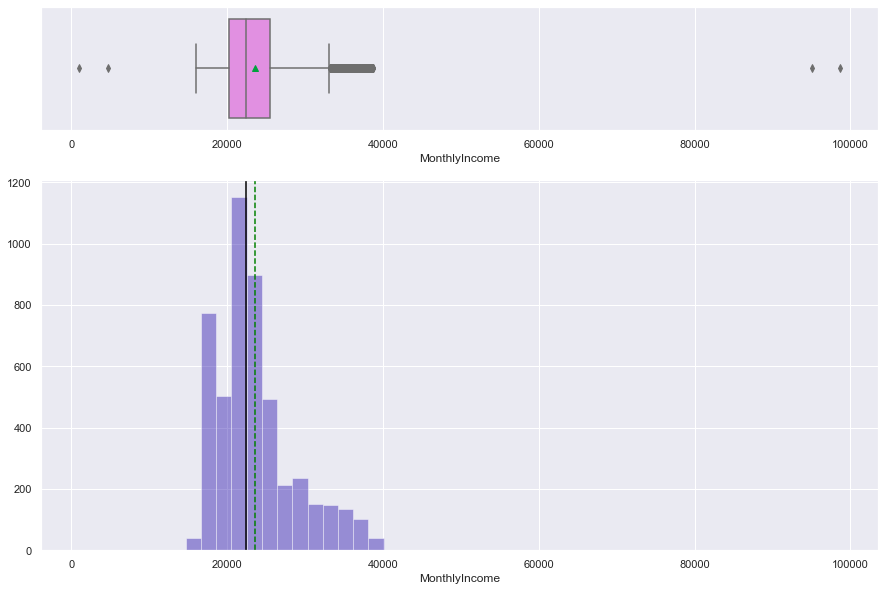

In [63]:
histogram_boxplot(data['MonthlyIncome'])

The upper limit will be set to 40,000 because of the abundance of points in this region, we don't want to remove a pattern from the data. 

In [64]:
print(data['MonthlyIncome'].quantile(0.01))
print(data['MonthlyIncome'].skew())

16859.0
2.0169560244109936


In [65]:
data["MonthlyIncome"] = np.where(data["MonthlyIncome"] <16859.0, 16859.0,data['MonthlyIncome'])
data["MonthlyIncome"] = np.where(data["MonthlyIncome"] >40000.0, 40000.0,data['MonthlyIncome'])
print(data['MonthlyIncome'].skew())

1.0985633489312028


The skewness  for MonthlyIncome was reduced from 2.017 to 1.098 which is good. Ideally, we want our skew values to be between -1 and 1, but this is close enough. We don't want to remove patterns from the data.

#### Capping and Flooring DurationOfPitch

In [66]:
print(data['DurationOfPitch'].quantile(0.01))
print(data['DurationOfPitch'].quantile(0.99))
print(data['DurationOfPitch'].skew())

6.0
35.0
1.798800993177324


In [67]:
data["DurationOfPitch"] = np.where(data["DurationOfPitch"] <6.0, 6.0,data['DurationOfPitch'])
data["DurationOfPitch"] = np.where(data["DurationOfPitch"] >35.0, 35.0,data['DurationOfPitch'])
print(data['DurationOfPitch'].skew())

0.9248456166640266


The skewness  for DurationOfPitch was reduced from 1.79 to 0.92 which is good. Our skewness value is between the ideal range of -1 to 1.

### Feature Engineering

To start, all non numeric columns must be converted to numeric through encoding.

In [68]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,33.054181,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


The non numeric columns are:
1. TypeofContact 
2. Occupation
3. Gender
4. ProductPitched
5. MaritalStatus
6. Designation	

Let's create a list of these features for encoding:

In [69]:
encode_list=['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

In [70]:
ind_vars=data.drop(['ProdTaken'],axis=1)
dep_var=data[['ProdTaken']]
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=encode_list,
        drop_first=True,
    )
    return x
ind_vars_num = encode_cat_vars(ind_vars)


In [71]:
ind_vars_num.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0
2,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
3,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33.054181,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


All independant features are now encoded. 

Additional feature engineering that could be done includes binning monthlyincome into various brackets.

### Scaling and other preparations for modelling

make sure you use ind_vars_num here

In [72]:
scaler=StandardScaler() #initializing the scaler

#Fitting the scaler to the data
ind_vars_num_scaled=pd.DataFrame(scaler.fit_transform(ind_vars_num))

#reverting the scaled set's columns names back to the original
ind_vars_num_scaled.columns=ind_vars_num.columns

#verify changes
ind_vars_num_scaled.head(10)

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0.385056,1.468369,-1.184699,0.130966,-0.710021,-0.725222,-1.265714,1.561221,-0.789477,0.782392,-1.393568,-0.498795,0.639571,-0.312155,1.031595,-0.862104,-1.216019,1.349878,-0.22221,-0.423046,-0.274283,-0.958315,2.082365,-0.402678,-0.777642,1.349878,-0.423046,-0.22221
1,1.261257,-0.713871,-0.181314,0.130966,0.292203,0.529604,-0.697184,-0.640524,-0.057226,0.782392,0.953955,-0.669653,-1.563547,-0.312155,1.031595,-0.862104,0.822356,1.349878,-0.22221,-0.423046,-0.274283,-0.958315,-0.480223,-0.402678,-0.777642,1.349878,-0.423046,-0.22221
2,-0.053045,-0.713871,-0.933853,0.130966,0.292203,-0.725222,2.145467,1.561221,-0.057226,-1.278132,-1.393568,-1.271517,0.639571,-0.312155,-0.969372,-0.862104,0.822356,-0.740808,-0.22221,-0.423046,-0.274283,-0.958315,2.082365,-0.402678,1.285938,-0.740808,-0.423046,-0.22221
3,-0.491146,-0.713871,-0.808430,-1.248694,-0.710021,-0.725222,-0.697184,1.561221,1.407276,0.782392,-0.219807,-1.109370,-1.563547,-0.312155,1.031595,-0.862104,-1.216019,-0.740808,-0.22221,-0.423046,-0.274283,-0.958315,-0.480223,-0.402678,1.285938,-0.740808,-0.423046,-0.22221
4,-0.485211,-0.713871,-0.933853,-1.248694,-0.710021,0.529604,-1.265714,-0.640524,1.407276,0.782392,-1.393568,-0.998699,0.639571,-0.312155,-0.969372,1.159952,0.822356,-0.740808,-0.22221,-0.423046,-0.274283,-0.958315,-0.480223,-0.402678,1.285938,-0.740808,-0.423046,-0.22221
5,-0.600671,-0.713871,-0.933853,0.130966,-0.710021,-0.725222,-1.265714,-0.640524,1.407276,0.782392,-0.219807,-1.077891,-1.563547,-0.312155,1.031595,-0.862104,0.822356,-0.740808,-0.22221,-0.423046,-0.274283,-0.958315,2.082365,-0.402678,1.285938,-0.740808,-0.423046,-0.22221
6,2.356509,-0.713871,-0.808430,-1.248694,-1.712246,1.784431,1.008407,1.561221,-0.789477,0.782392,-0.219807,-1.156688,0.639571,-0.312155,-0.969372,1.159952,-1.216019,-0.740808,-0.22221,-0.423046,-0.274283,-0.958315,-0.480223,-0.402678,1.285938,-0.740808,-0.423046,-0.22221
7,-0.819721,-0.713871,1.825456,0.130966,-0.710021,-0.725222,-0.697184,-0.640524,-0.789477,-1.278132,-0.219807,-1.152134,0.639571,-0.312155,1.031595,-0.862104,0.822356,-0.740808,-0.22221,-0.423046,-0.274283,1.043498,-0.480223,-0.402678,1.285938,-0.740808,-0.423046,-0.22221
8,0.056480,-0.713871,1.700033,-1.248694,0.292203,-0.725222,-1.265714,-0.640524,-0.057226,-1.278132,-1.393568,0.200674,-1.563547,-0.312155,1.031595,-0.862104,0.822356,-0.740808,-0.22221,2.363811,-0.274283,-0.958315,-0.480223,2.483376,-0.777642,-0.740808,2.363811,-0.22221
9,-0.162570,-0.713871,2.201725,0.130966,-0.710021,-0.725222,2.145467,-0.640524,-0.057226,0.782392,-1.393568,-0.648469,0.639571,-0.312155,-0.969372,1.159952,0.822356,1.349878,-0.22221,-0.423046,-0.274283,-0.958315,-0.480223,-0.402678,-0.777642,1.349878,-0.423046,-0.22221


### Split Data

We saw earlier that there was an imbalance in the target class, so we can use stratify=True to account for this

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    ind_vars_num_scaled, dep_var, test_size=0.3, random_state=1,stratify=dep_var)

# Model Evaluation Criterion

## Model can make wrong predictions as:

1. Predicting someone will buy the wellness travel plan when they will not actually
2. Predicting someone will not buy the wellness travel plan when they will actually

## Which Case is more important?

* Case 2 is more important, as we want to target viable customers with the offer.
* The company is currently sending out offers completely randomly therefore, any reduction in case 1 is a positive.
 

## How to reduce this loss i.e. need to reduce False Negatives?

* Therefore: we want our model to reduce errors of type False Negatives and our metric to maximize would be recall= TP/(TP+FN) so that we can target the most people that would most likely purchase the package.

Create a function for getting metrics on model performance for model evaluation:

In [74]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

Create a function to create the confusion matrix:

In [75]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model building - Bagging

1. Decision Tree
2. Bagging Classifier
3. Random Forest


## Decision Tree

Because the target class is imbalanced, we can set class_weight='balanced'.
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [76]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

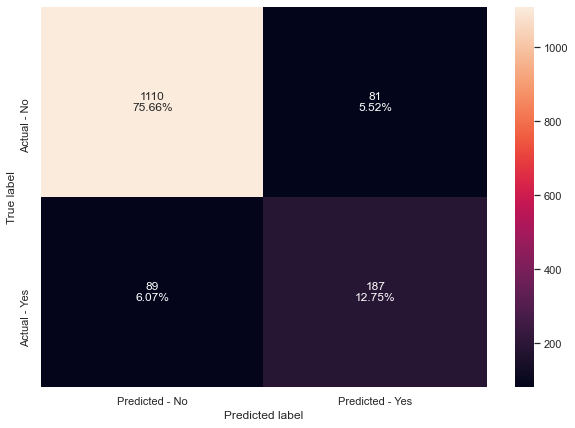

In [77]:
make_confusion_matrix(dtree,y_test)

In [78]:
get_metrics_score(dtree,X_train,X_test,y_train,y_test);

Accuracy on training set :  1.0
Accuracy on test set :  0.8841172460804363
Recall on training set :  1.0
Recall on test set :  0.677536231884058
Precision on training set :  1.0
Precision on test set :  0.6977611940298507
F1 on training set :  1.0
F1 on test set :  0.6874999999999999


As expected, the base decision tree is over fitting, however provides better than random guessing predictions on test data.

## Bagging Classifier

In [79]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

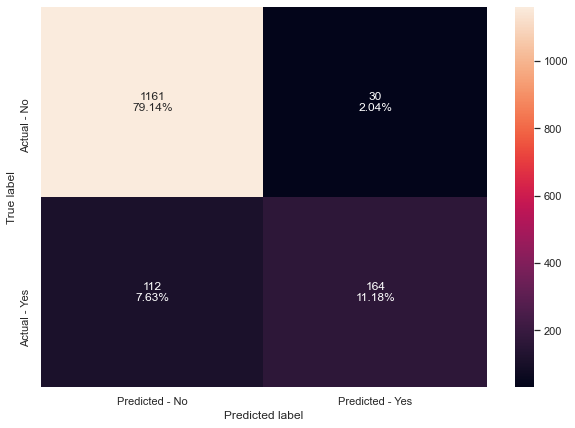

In [80]:
make_confusion_matrix(bagging,y_test)

In [81]:
get_metrics_score(bagging,X_train,X_test,y_train,y_test);

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9032038173142468
Recall on training set :  0.9720496894409938
Recall on test set :  0.5942028985507246
Precision on training set :  0.9984051036682615
Precision on test set :  0.845360824742268
F1 on training set :  0.985051140833989
F1 on test set :  0.6978723404255318


The baseline bagging classifier is over fitting, and performs slightly worse on testing data than a single decision tree.

### Bagging classifier with weighted decision tree

In [82]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  random_state=1)

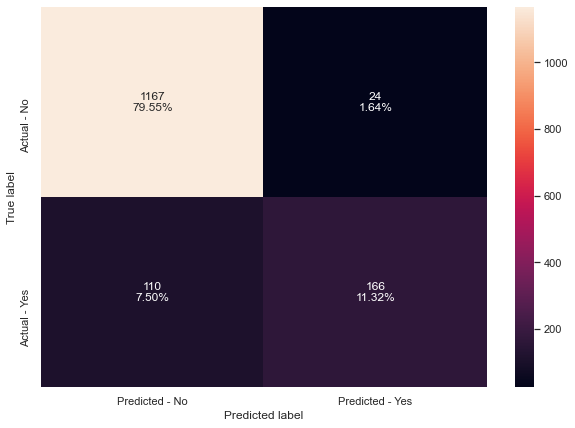

In [83]:
make_confusion_matrix(bagging_wt,y_test)

In [84]:
get_metrics_score(bagging_wt,X_train,X_test,y_train,y_test);

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9086571233810498
Recall on training set :  0.9736024844720497
Recall on test set :  0.6014492753623188
Precision on training set :  0.9968203497615262
Precision on test set :  0.8736842105263158
F1 on training set :  0.9850746268656716
F1 on test set :  0.7124463519313304


After weighting the classes, only slight improvements (<1%) are seen on the test data.

# Random Forest

In [85]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

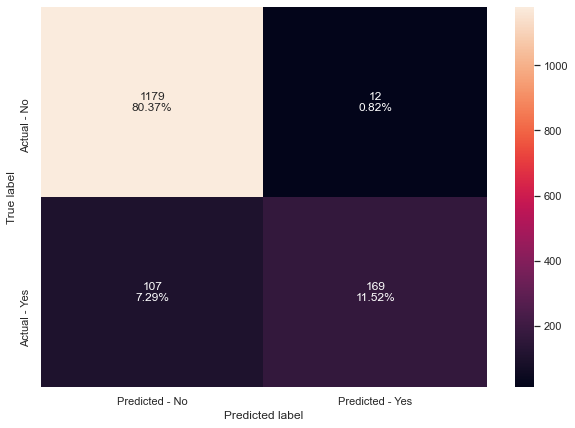

In [86]:
make_confusion_matrix(rf,y_test)

In [87]:
get_metrics_score(rf,X_train,X_test,y_train,y_test);

Accuracy on training set :  1.0
Accuracy on test set :  0.9188820722563054
Recall on training set :  1.0
Recall on test set :  0.6123188405797102
Precision on training set :  1.0
Precision on test set :  0.9337016574585635
F1 on training set :  1.0
F1 on test set :  0.7396061269146608


The Random Forest is also over fitting the problem, we can try weighting the target's classes:

### Random forest with class weights

In [88]:
rf_wt = RandomForestClassifier(class_weight='balanced', random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

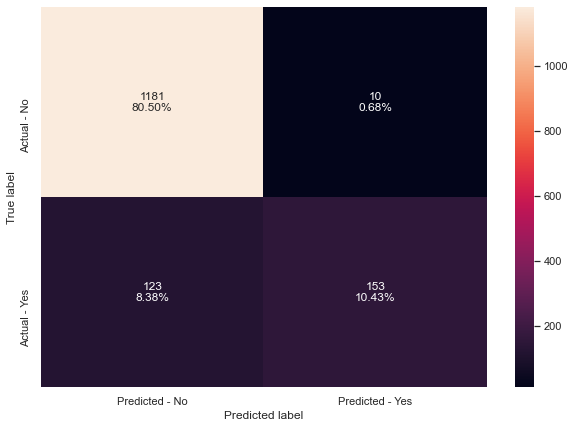

In [89]:
make_confusion_matrix(rf_wt,y_test)

In [90]:
get_metrics_score(rf_wt,X_train,X_test,y_train,y_test);

Accuracy on training set :  1.0
Accuracy on test set :  0.9093387866394002
Recall on training set :  1.0
Recall on test set :  0.5543478260869565
Precision on training set :  1.0
Precision on test set :  0.9386503067484663
F1 on training set :  1.0
F1 on test set :  0.6970387243735763


The weighting actually resulted in a decrease for performance on testing data.

## Tuning models

## Using GridSearch for Hyperparamter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### Tuning Decision Tree

In [91]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight='balanced',random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,15), 
              #'min_samples_leaf': [1, 2, 5, 7, 10],
              #'max_leaf_nodes' : [2, 3, 5, 10,15],
              #'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
            'min_samples_leaf': [9,10,11,12],
              'max_leaf_nodes' : [15,17,19,20],
              'min_impurity_decrease': [0.00005,0.0001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, max_leaf_nodes=20,
                       min_impurity_decrease=5e-05, min_samples_leaf=10,
                       random_state=1)

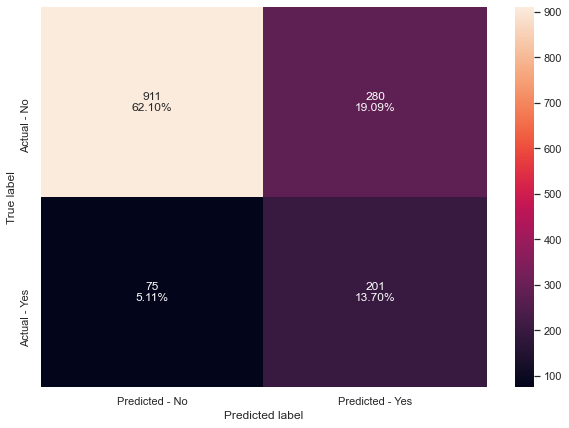

In [92]:
make_confusion_matrix(dtree_estimator,y_test)

In [93]:
get_metrics_score(dtree_estimator,X_train,X_test,y_train,y_test);

Accuracy on training set :  0.7746273019584917
Accuracy on test set :  0.7580095432856169
Recall on training set :  0.7360248447204969
Recall on test set :  0.7282608695652174
Precision on training set :  0.4409302325581395
Precision on test set :  0.4178794178794179
F1 on training set :  0.5514834205933682
F1 on test set :  0.5310435931307794


The tuned decision tree has much better perfomance and is no longer over fitting the problem. Still looking to improve from 72% recall, though.

### Tuning Bagging Classifier

In [96]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight='balanced',random_state=1)
param_grid = {'base_estimator':[cl1],
              #'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators':[15,17,20,22,25]}
             

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator=grid_obj.best_estimator_
# Fit the best algorithm to the data. 
bagging_estimator.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=8, max_leaf_nodes=20,
                       min_impurity_decrease=5e-05, min_samples_leaf=10,
                       random_state=1)

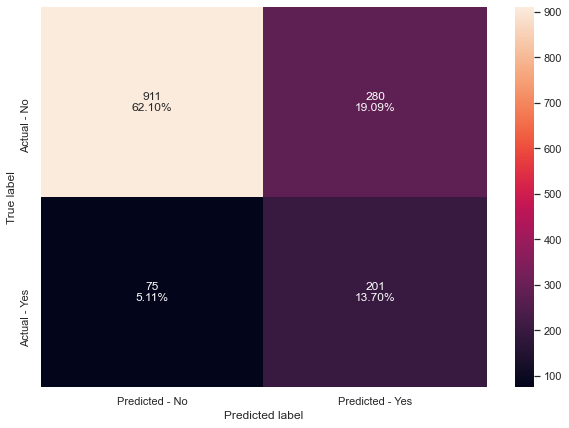

In [97]:
make_confusion_matrix(bagging_estimator,y_test)

In [98]:
get_metrics_score(bagging_estimator,X_train,X_test,y_train,y_test);

Accuracy on training set :  0.7746273019584917
Accuracy on test set :  0.7580095432856169
Recall on training set :  0.7360248447204969
Recall on test set :  0.7282608695652174
Precision on training set :  0.4409302325581395
Precision on test set :  0.4178794178794179
F1 on training set :  0.5514834205933682
F1 on test set :  0.5310435931307794


The Tuned bagging classifier is no longer over fitting the data. It performs about equally compared to the decision tree however, and the increase in complexity is not worth the computational power.

### Tuning Random Forest

In [99]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": np.arange(50,400,50),
        "min_samples_leaf": np.arange(1,6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, random_state=1)

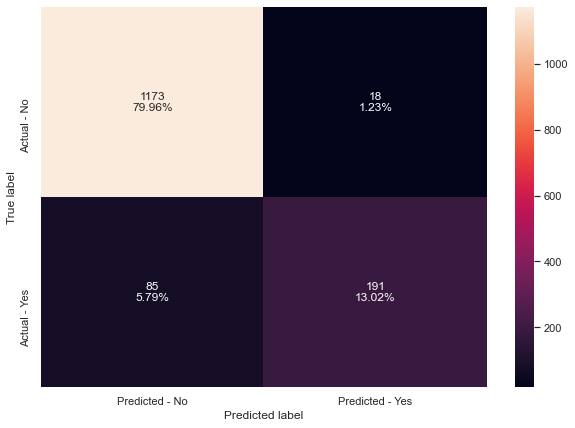

In [100]:
make_confusion_matrix(rf_estimator,y_test)

In [101]:
get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test);

Accuracy on training set :  1.0
Accuracy on test set :  0.9297886843899114
Recall on training set :  1.0
Recall on test set :  0.6920289855072463
Precision on training set :  1.0
Precision on test set :  0.9138755980861244
F1 on training set :  1.0
F1 on test set :  0.7876288659793814


The tuned random forest appears to still be over fitting the data a bit and also performs worse regarding its recall score. However, the random forest has the highest precision yet, and could prove as a viable component in a stacking classifier because of its half decent recall at the same time. More on this later.

## Comparing all the models:

In [102]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [103]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [104]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [105]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [106]:
comparison_frame_bagging = pd.DataFrame({'Bagging Models':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame_bagging

,Bagging Models,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.884117,1.000000,0.677536,1.000000,0.697761
1,Tuned Decision Tree,0.774627,0.758010,0.736025,0.728261,0.440930,0.417879
2,Bagging Classifier,0.994446,0.903204,0.972050,0.594203,0.998405,0.845361
3,Weighted Bagging Classifier,0.994446,0.908657,0.973602,0.601449,0.996820,0.873684
4,Tuned Bagging Classifier,0.774627,0.758010,0.736025,0.728261,0.440930,0.417879
5,Random Forest,1.000000,0.918882,1.000000,0.612319,1.000000,0.933702
6,Weighted Random Forest,1.000000,0.909339,1.000000,0.554348,1.000000,0.938650
7,Tuned Random Forest,1.000000,0.929789,1.000000,0.692029,1.000000,0.913876


All of the bagging models had test recall scores between 60 and 73%. I bealieve the tuned decision tree model is the best so far, as it hasn't captured too much noise in the training data, and still generalizes well to new data sets without over fitting. The tuned bagging classifier has the same metrics as the decision tree but costs much more computational power.
Let's make some more models, this time lets try some boosting algorithms:

# Model building - Boosting

1. Adaboost
2. gradient boost
3. xgboost
4. stacking classifier

## Adaboost classifier

In [107]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

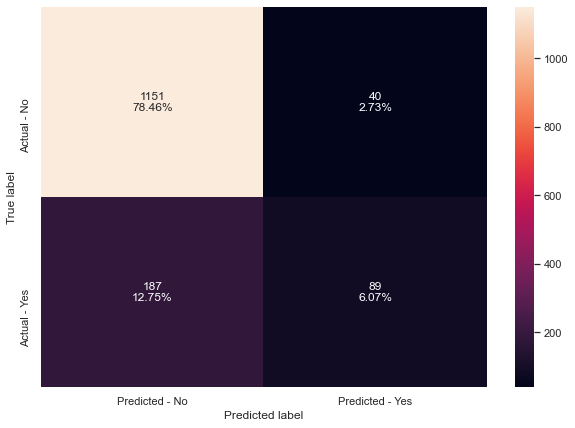

In [108]:
make_confusion_matrix(ab_classifier,y_test)

In [109]:
get_metrics_score(ab_classifier,X_train,X_test,y_train,y_test);

Accuracy on training set :  0.84536685179772
Accuracy on test set :  0.8452624403544649
Recall on training set :  0.32608695652173914
Recall on test set :  0.322463768115942
Precision on training set :  0.6885245901639344
Precision on test set :  0.689922480620155
F1 on training set :  0.44257112750263433
F1 on test set :  0.4395061728395062


The baseline ada boost classifier performs very poorly, but does not over fit. 

In [110]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=1)

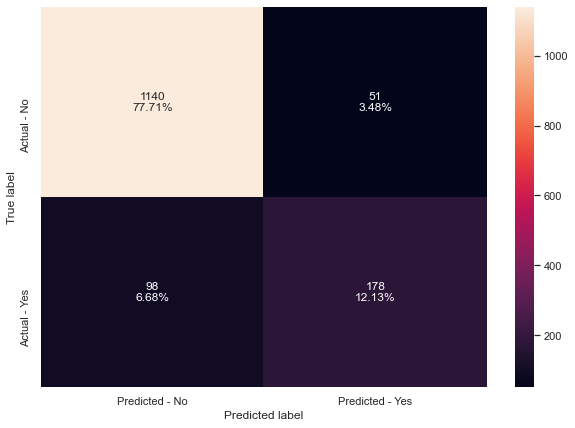

In [111]:
make_confusion_matrix(abc_tuned,y_test)

In [112]:
get_metrics_score(abc_tuned,X_train,X_test,y_train,y_test);

Accuracy on training set :  0.9903536977491961
Accuracy on test set :  0.8984321745057942
Recall on training set :  0.9580745341614907
Recall on test set :  0.644927536231884
Precision on training set :  0.9903691813804173
Precision on test set :  0.777292576419214
F1 on training set :  0.973954222573007
F1 on test set :  0.7049504950495049


After tuning, the adaboost classifier is over fitting the data (performs better in training than in testing). Its metrics on the test data have improved however. 

## Gradient Boosting Classifier

In [113]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

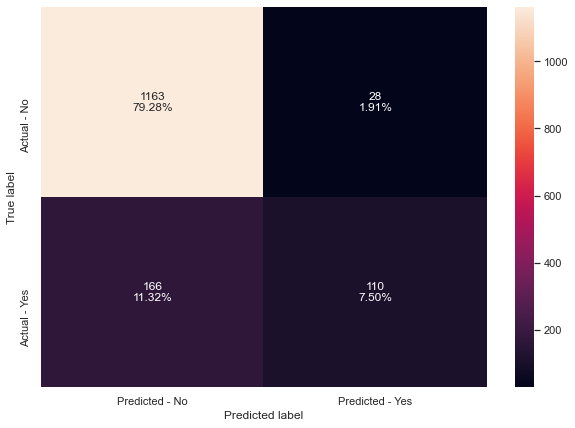

In [114]:
make_confusion_matrix(gb_classifier,y_test)

In [115]:
get_metrics_score(gb_classifier,X_train,X_test,y_train,y_test);

Accuracy on training set :  0.8897983045893014
Accuracy on test set :  0.8677573278800272
Recall on training set :  0.468944099378882
Recall on test set :  0.39855072463768115
Precision on training set :  0.8961424332344213
Precision on test set :  0.7971014492753623
F1 on training set :  0.6156982670744139
F1 on test set :  0.5314009661835749


The baseline gradient boosting classifier has poor performance and over fits. Let's tune it:

In [116]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    #"n_estimators": [100,150,200,250],
    #"n_estimators": [250,275,300,325],
    "n_estimators": np.arange(300,1000,100),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=900, random_state=1,
                           subsample=0.8)

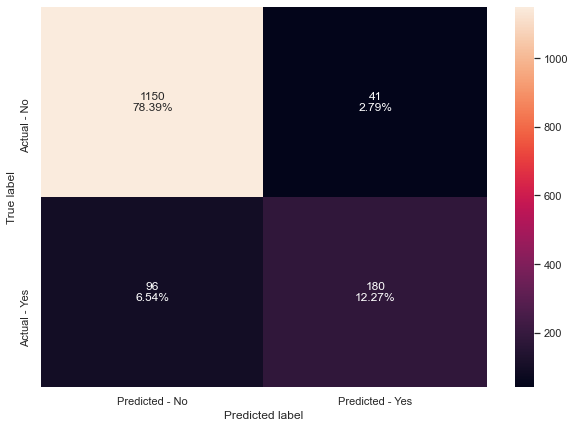

In [117]:
#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

In [118]:
get_metrics_score(gbc_tuned,X_train,X_test,y_train,y_test);

Accuracy on training set :  0.9935691318327974
Accuracy on test set :  0.9066121336059987
Recall on training set :  0.9658385093167702
Recall on test set :  0.6521739130434783
Precision on training set :  1.0
Precision on test set :  0.8144796380090498
F1 on training set :  0.9826224328593997
F1 on test set :  0.7243460764587525


We can see that performance in testing and training has increased, however tuneing did not stop the model from over fitting the problem. We can try XGBoost instead.

## XGBoost Classifier

In [119]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train.drop(['CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar'],axis=1),y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

*Had to remove some columns from the xgboost algorithm. They were in the data type of category, and xgboost documentation says this was okay, however these specific columns kept breaking the algorithm. After extensively looking into the issue I had to settle for dropping the columns from the algorithm.

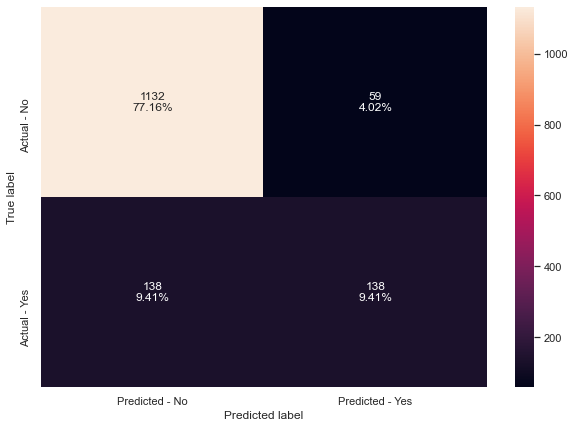

In [120]:
def make_confusion_matrix1(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test.drop(['CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar'],axis=1))
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
make_confusion_matrix1(xgb_classifier,y_test)

In [121]:
get_metrics_score(xgb_classifier,X_train.drop(['CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar'],axis=1),X_test.drop(['CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar'],axis=1),y_train,y_test);

Accuracy on training set :  0.9871382636655949
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.9332298136645962
Recall on test set :  0.5
Precision on training set :  0.9983388704318937
Precision on test set :  0.700507614213198
F1 on training set :  0.9646869983948635
F1 on test set :  0.5835095137420718


The xgboost algorithm is also over fitting the problem. -> we can try tuning it to improve model performance

In [122]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    #"scale_pos_weight":[1,2,5],
    "scale_pos_weight":[5,6,7],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train.drop(['CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar'],axis=1), y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train.drop(['CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar'],axis=1), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=7, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

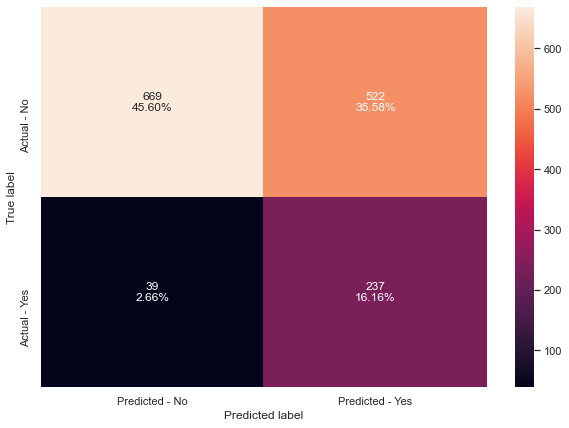

In [123]:
make_confusion_matrix1(xgb_tuned,y_test)

In [124]:
get_metrics_score(xgb_tuned,X_train.drop(['CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar'],axis=1),X_test.drop(['CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar'],axis=1),y_train,y_test);

Accuracy on training set :  0.6658871674948845
Accuracy on test set :  0.6175869120654397
Recall on training set :  0.9611801242236024
Recall on test set :  0.8586956521739131
Precision on training set :  0.3563615428900403
Precision on test set :  0.31225296442687744
F1 on training set :  0.5199496010079798
F1 on test set :  0.4579710144927536


The model is performing much better now! Testing recall is now up to 85%! however, this model is still over fitting the problem. We can try a combination of models in a stacking classifier:

## Stacking Classifier

In [135]:
estimators = [('Bagging Classifier Tuned',bagging_estimator), ('Tuned AdaBoost classifier',abc_tuned), ('Tuned Random Forest',rf_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Bagging Classifier Tuned',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=8,
                                                       max_leaf_nodes=20,
                                                       min_impurity_decrease=5e-05,
                                                       min_samples_leaf=10,
                                                       random_state=1)),
                               ('Tuned AdaBoost classifier',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Tuned Random Forest'...
                                                 eval_metric='logloss', gamma=0,
                                             

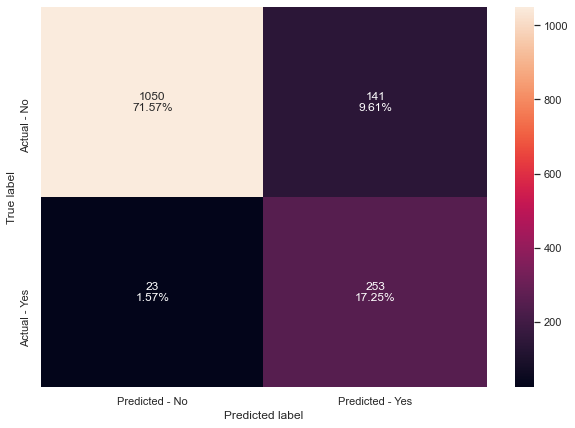

In [136]:
make_confusion_matrix(stacking_classifier,y_test)

In [137]:
get_metrics_score(stacking_classifier,X_train,X_test,y_train,y_test);

Accuracy on training set :  0.9836305173925752
Accuracy on test set :  0.8882072256305386
Recall on training set :  1.0
Recall on test set :  0.9166666666666666
Precision on training set :  0.92
Precision on test set :  0.6421319796954315
F1 on training set :  0.9583333333333334
F1 on test set :  0.7552238805970148


The stacking classifier gets all the way up to 91% test recall score. However, the model is still over fitting as it is performing perfectly in training data. This is the best model so far regarding recall predictions. We can compare all models below:

# Compare all models

In [138]:
# defining list of models
models = [dtree, dtree_estimator,rf, rf_estimator, bagging,bagging_estimator,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier,bagging_wt,rf_wt]

# defining empty lists to add train and test results
acc_train = [];
acc_test = [];
recall_train = [];
recall_test = [];
precision_train = [];
precision_test = [];
f1_train = [];
f1_test = [];

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    if model == xgb_classifier or model == xgb_tuned:
        j=get_metrics_score(model,X_train.drop(['CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar'],axis=1),X_test.drop(['CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar'],axis=1),y_train,y_test);
        acc_train.append(j[0]);
        acc_test.append(j[1]);
        recall_train.append(j[2]);
        recall_test.append(j[3]);
        precision_train.append(j[4]);
        precision_test.append(j[5]);
        f1_train.append(j[6]);
        f1_test.append(j[7]);
    else:
        j = get_metrics_score(model,X_train,X_test,y_train,y_test);
        acc_train.append(j[0]);
        acc_test.append(j[1]);
        recall_train.append(j[2]);
        recall_test.append(j[3]);
        precision_train.append(j[4]);
        precision_test.append(j[5]);
        f1_train.append(j[6]);
        f1_test.append(j[7]);

Accuracy on training set :  1.0
Accuracy on test set :  0.8841172460804363
Recall on training set :  1.0
Recall on test set :  0.677536231884058
Precision on training set :  1.0
Precision on test set :  0.6977611940298507
F1 on training set :  1.0
F1 on test set :  0.6874999999999999
Accuracy on training set :  0.7746273019584917
Accuracy on test set :  0.7580095432856169
Recall on training set :  0.7360248447204969
Recall on test set :  0.7282608695652174
Precision on training set :  0.4409302325581395
Precision on test set :  0.4178794178794179
F1 on training set :  0.5514834205933682
F1 on test set :  0.5310435931307794
Accuracy on training set :  1.0
Accuracy on test set :  0.9188820722563054
Recall on training set :  1.0
Recall on test set :  0.6123188405797102
Precision on training set :  1.0
Precision on test set :  0.9337016574585635
F1 on training set :  1.0
F1 on test set :  0.7396061269146608
Accuracy on training set :  1.0
Accuracy on test set :  0.9297886843899114
Recall o

In [139]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier','Bagging classifier w/ class weights','Random Forest w/ class weights'], 
                                'Train_Accuracy': acc_train,
                                'Test_Accuracy': acc_test,
                                'Train_Recall':recall_train,
                                'Test_Recall':recall_test,
                                'Train_Precision':precision_train,
                                'Test_Precision':precision_test,
                                'Train_F1-Score':f1_train,
                                'Test_F1-Score':f1_test}) 

#Sorting models in descending order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
12,Stacking Classifier,0.983631,0.888207,1.000000,0.916667,0.920000,0.642132,0.958333,0.755224
11,Tuned XGBoost Classifier,0.665887,0.617587,0.961180,0.858696,0.356362,0.312253,0.519950,0.457971
1,Tuned Decision Tree,0.774627,0.758010,0.736025,0.728261,0.440930,0.417879,0.551483,0.531044
5,Bagging Classifier Tuned,0.774627,0.758010,0.736025,0.728261,0.440930,0.417879,0.551483,0.531044
3,Tuned Random Forest,1.000000,0.929789,1.000000,0.692029,1.000000,0.913876,1.000000,0.787629
0,Decision Tree,1.000000,0.884117,1.000000,0.677536,1.000000,0.697761,1.000000,0.687500
9,Tuned Gradient Boosting Classifier,0.993569,0.906612,0.965839,0.652174,1.000000,0.814480,0.982622,0.724346
7,Tuned AdaBoost Classifier,0.990354,0.898432,0.958075,0.644928,0.990369,0.777293,0.973954,0.704950
2,Random Forest,1.000000,0.918882,1.000000,0.612319,1.000000,0.933702,1.000000,0.739606
13,Bagging classifier w/ class weights,0.994446,0.908657,0.973602,0.601449,0.996820,0.873684,0.985075,0.712446


# Model Performance Evaluation:

Here, you can see all models ranked by their score in Test_recall. Only a few models didn't over fit the problem. they were the tuned decision tree and the tuned bagging classifier. The rest of the models to some degree over fit the problem in training. The best performance comes from the stacking classifier, which allowed us to combine the best models we had into one estimator. I believe the stacking classifier is the best model amongst the above, and the tuned decision tree could serve as a solid back up model (if the over fitting of the stacking classifier became a problem). Unfortunately, XGBoost algorithm was not able to see all of the data, due to some issues several columns were dropped. I believe if I had more time to resolve this issue I could achieve even better performance on that model and the stacking classifier it is used in. Another way to possibly improve model performance would be to bin the MonthlyIncome column. I believe this may assist the algorithms in finding useful trends. However, figuring out how big and where the divisions for the bins is not a simple choice here.

# Actionable Insights and Recommendations

During EDA, I noticed that the main influencing factor on which product you will currently be pitched is perfectly correlated with the customer's designation in their workplace. Using these models to target customers would be a much better approach. 

With the introduction of the wellness tourism package, clients to pitch to will have to be hand picked until enough data is collected to incorporate these customers into the model. Suggestions for marketing to these people would be to market towards single/divorced people who have an interest in becoming more fit and exploring themselves.